# JAI SHREE RAM

## Importing necessary packages

In [46]:
import pandas as pd 
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as pl
import tensorflow as tf
import seaborn as sns
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import matplotlib.patches as patches
import joblib
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tabulate import tabulate
from scipy.optimize import minimize


## What was the change in price of the stock overtime?

In [47]:
# The tech stocks we'll use for this analysis
tech_list =['TCS.NS','NESTLEIND.NS','TITAN.NS','ASTRAL.BO','TATAPOWER.NS','SUZLON.NS',
            'HINDPETRO.BO','HDFCBANK.NS','INFY.NS','ULTRACEMCO.NS','MAHLIFE.BO','ADANIGREEN.BO']

# Set up End and Start times for data grab
end = dt.datetime.now()
start = dt.date(end.year - 10, end.month, end.day)

# Initialize an empty list to store stock data
stocks = []

for stock in tech_list:
    # Download stock data
    stock_data = yf.download(stock, start=start, end=end)
    
    # Add a column for the company name
    stock_data["company_name"] = stock
    
    # Append the DataFrame to the list
    stocks.append(stock_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
type(stocks)

list

## Descriptive Statistics about the Data and Closing price

==================== TCS.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close       Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00      2462.00
mean   2309.62  2331.86  2286.14  2308.83    2136.62   2665534.35
std     989.42   997.48   981.56   989.56    1021.64   2395319.42
min    1058.45  1070.00  1025.95  1050.57     898.00         0.00
25%    1290.00  1303.03  1277.50  1288.94    1084.67   1636761.25
50%    2082.65  2104.38  2059.05  2079.33    1879.25   2210644.50
75%    3280.00  3308.92  3251.28  3274.76    3134.31   3088995.50
max    4560.00  4565.00  4500.00  4551.50    4551.50  88067154.00




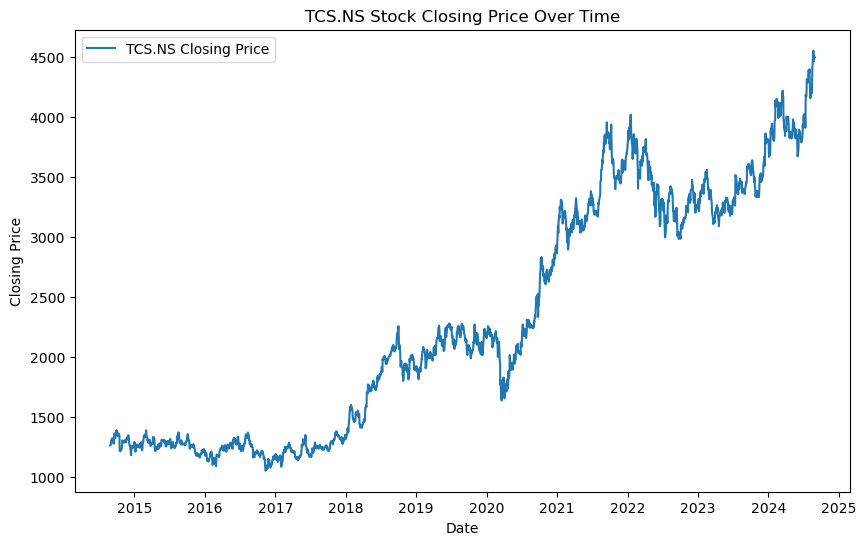

==================== NESTLEIND.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close       Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00      2462.00
mean   1349.77  1363.01  1334.75  1348.72    1285.03    712119.67
std     644.32   649.06   638.16   643.64     662.04    658467.25
min     504.00   505.99   498.10   500.80     438.83         0.00
25%     682.85   689.01   675.54   681.09     600.39    344795.00
50%    1263.47  1279.45  1249.25  1261.30    1193.08    546550.00
75%    1858.70  1880.90  1842.95  1861.18    1815.62    857017.50
max    2754.00  2769.30  2702.41  2737.24    2717.75  11067460.00




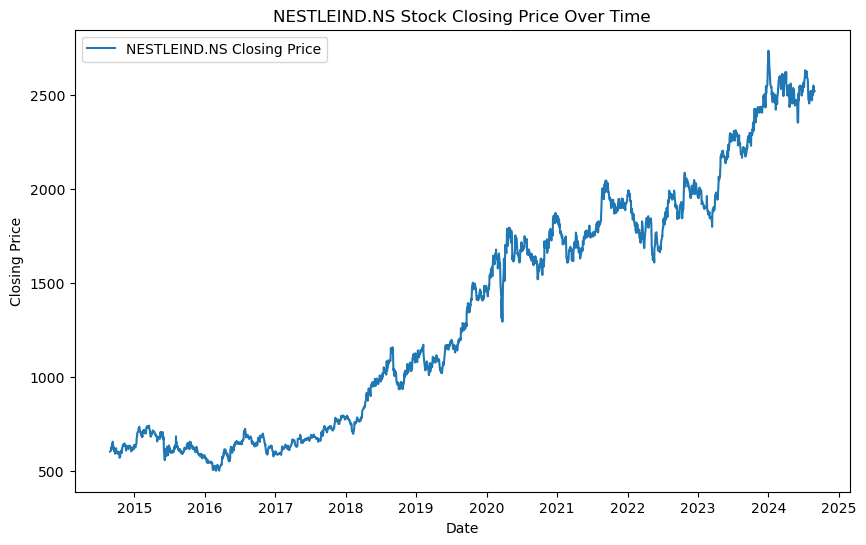

==================== TITAN.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close       Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00      2462.00
mean   1410.95  1426.71  1393.04  1409.95    1387.33   1792051.11
std    1028.06  1036.63  1017.50  1027.02    1028.06   1764499.29
min     304.00   306.30   296.15   303.30     290.90         0.00
25%     441.06   446.31   435.35   440.24     421.91    841699.75
50%    1076.95  1092.80  1059.35  1077.83    1050.13   1317738.00
75%    2370.00  2395.61  2338.75  2371.12    2342.95   2164920.50
max    3882.00  3886.95  3800.00  3866.65    3854.04  27100101.00




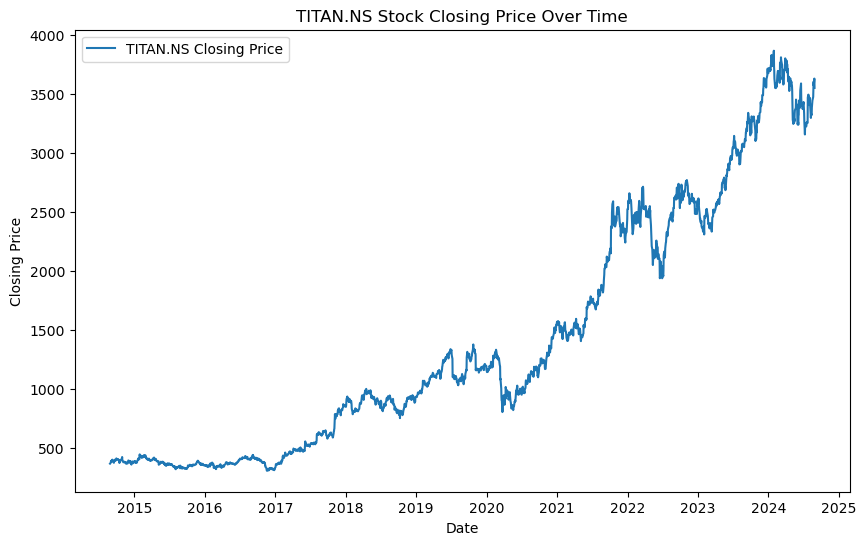

==================== ASTRAL.BO Summary Statistics ====================

          Open     High      Low    Close  Adj Close       Volume
count  2445.00  2445.00  2445.00  2445.00    2445.00      2445.00
mean    832.42   845.01   818.15   830.97     826.19     53189.28
std     655.12   663.90   645.52   654.21     653.46    723124.19
min     156.15   157.50   139.95   153.04     150.63        40.00
25%     225.90   229.50   222.75   226.06     222.56      4701.00
50%     542.25   552.28   531.56   539.35     534.02     10744.00
75%    1476.75  1497.00  1447.57  1475.14    1469.23     23518.00
max    2427.20  2453.95  2393.20  2416.10    2413.18  32108998.00




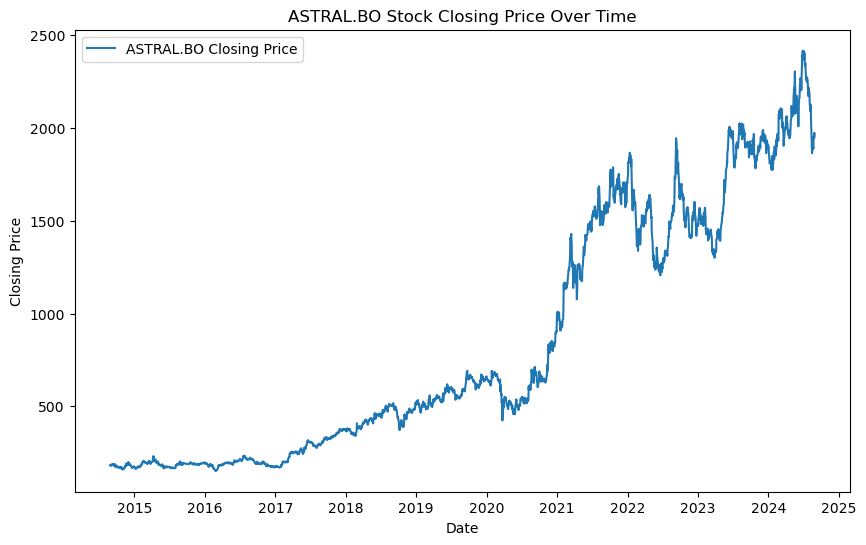

==================== TATAPOWER.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close        Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00  2.462000e+03
mean    132.18   133.98   130.03   131.91     125.17  1.528251e+07
std     100.07   101.30    98.48    99.85     102.23  2.347618e+07
min      27.25    28.60    27.00    27.30      25.56  0.000000e+00
25%      70.00    70.95    68.71    69.83      60.47  3.986058e+06
50%      82.00    82.70    80.85    81.70      70.15  7.310616e+06
75%     207.54   209.62   205.42   207.67     204.71  1.727398e+07
max     461.60   471.00   454.05   464.40     464.40  3.606618e+08




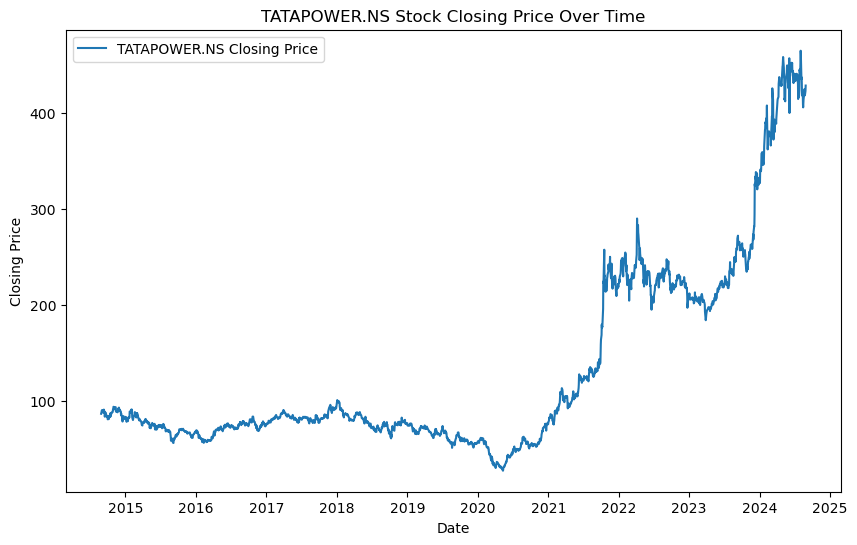

==================== SUZLON.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close        Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00  2.462000e+03
mean     13.70    13.98    13.36    13.65      13.65  5.402214e+07
std      12.10    12.33    11.81    12.09      12.09  6.996362e+07
min       1.56     1.65     1.56     1.61       1.61  0.000000e+00
25%       5.78     5.92     5.65     5.78       5.78  1.869762e+07
50%      10.32    10.58    10.05    10.22      10.22  3.252670e+07
75%      17.16    17.40    16.85    17.03      17.03  5.938279e+07
max      82.19    84.29    79.21    80.79      80.79  8.115259e+08




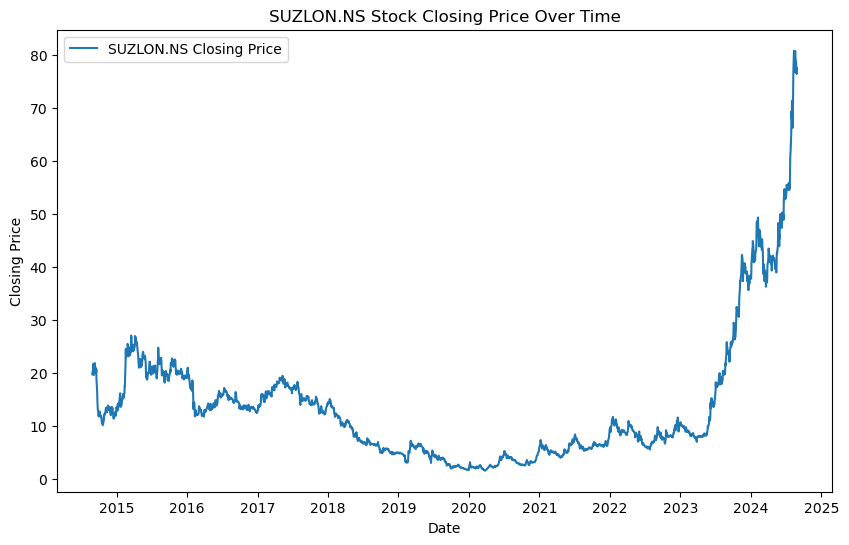

==================== HINDPETRO.BO Summary Statistics ====================

          Open     High      Low    Close  Adj Close       Volume
count  2461.00  2461.00  2461.00  2461.00    2461.00      2461.00
mean    182.17   185.09   178.91   181.85     131.12    642469.82
std      64.54    65.58    63.16    64.40      69.39    689989.02
min      67.85    68.87    66.67    67.87      21.95     14234.00
25%     141.63   144.10   139.33   141.40      98.56    262621.00
50%     171.27   173.37   168.73   171.00     128.49    453325.00
75%     206.00   209.23   202.00   205.80     156.14    790927.00
max     413.75   414.00   404.00   407.50     407.50  12977923.00




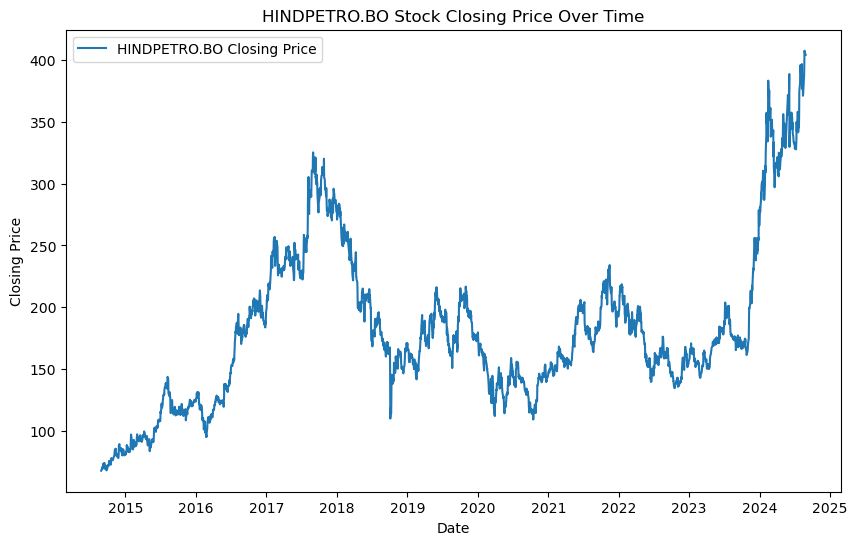

==================== HDFCBANK.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close        Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00  2.462000e+03
mean   1096.96  1106.64  1086.66  1096.80    1055.41  8.274704e+06
std     400.01   403.44   396.52   399.90     400.66  9.044873e+06
min     418.75   422.75   417.00   420.60     389.07  0.000000e+00
25%     697.68   704.93   692.49   697.11     655.04  2.982091e+06
50%    1094.25  1104.99  1083.50  1093.35    1046.46  5.450285e+06
75%    1483.19  1494.72  1467.00  1481.99    1436.18  1.027721e+07
max    1791.00  1794.00  1764.65  1768.65    1768.65  2.011300e+08




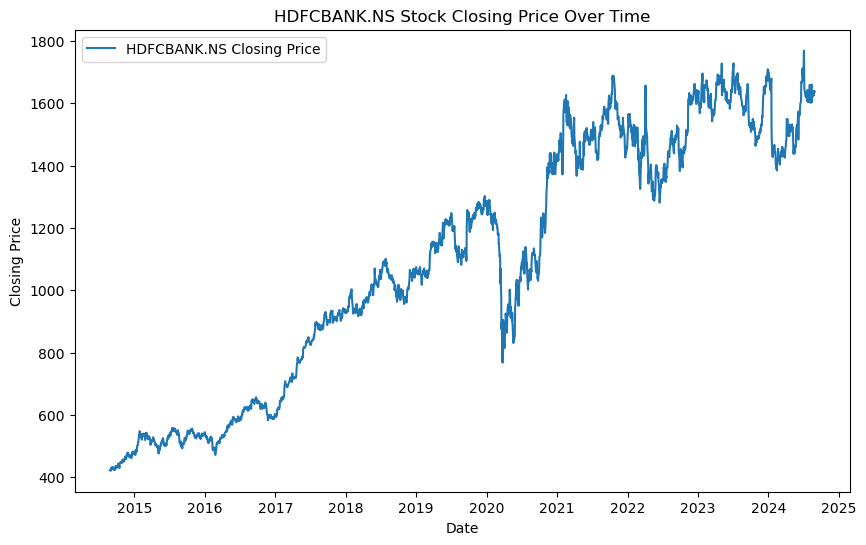

==================== INFY.NS Summary Statistics ====================

          Open     High      Low    Close  Adj Close        Volume
count  2462.00  2462.00  2462.00  2462.00    2462.00  2.462000e+03
mean    958.68   968.10   948.81   958.44     881.91  8.226722e+06
std     463.76   467.47   459.73   463.72     479.75  7.525618e+06
min     440.00   443.80   430.00   436.70     353.37  0.000000e+00
25%     549.43   554.92   540.81   548.50     442.29  5.067192e+06
50%     729.95   736.30   723.73   729.98     645.91  6.676416e+06
75%    1435.23  1446.84  1422.45  1434.15    1400.54  9.089224e+06
max    1938.55  1953.90  1930.50  1939.50    1900.10  1.663204e+08




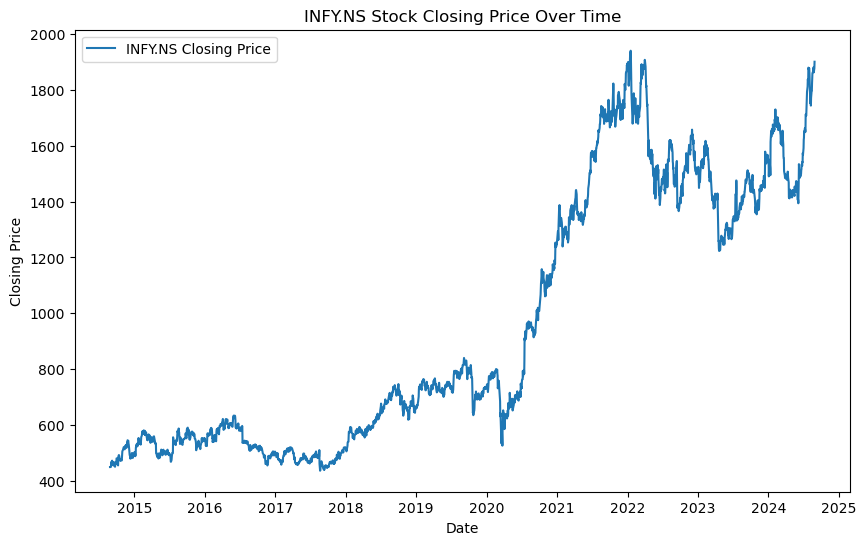

==================== ULTRACEMCO.NS Summary Statistics ====================

           Open      High       Low     Close  Adj Close      Volume
count   2462.00   2462.00   2462.00   2462.00    2462.00     2462.00
mean    5191.05   5247.68   5127.88   5185.53    5085.56   383092.78
std     2211.25   2228.26   2189.93   2208.81    2220.94   299494.73
min     2320.10   2355.05   2297.20   2317.60    2232.02        0.00
25%     3690.25   3740.92   3646.01   3694.84    3583.44   213530.75
50%     4196.50   4241.73   4152.02   4192.15    4081.89   303572.00
75%     6821.36   6902.96   6740.41   6814.20    6715.91   466742.25
max    11944.00  12078.00  11803.50  11984.50   11984.50  5134859.00




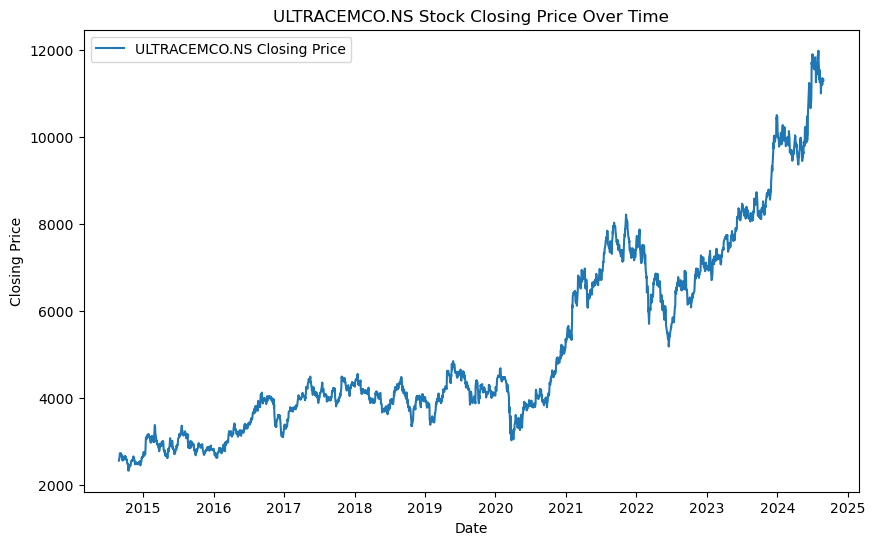

==================== MAHLIFE.BO Summary Statistics ====================

          Open     High      Low    Close  Adj Close      Volume
count  2443.00  2443.00  2443.00  2443.00    2443.00     2443.00
mean    229.82   233.91   225.69   229.32     216.80    24197.57
std     151.83   154.57   149.14   151.39     156.95   100925.19
min      57.73    59.68    57.07    58.33      57.81       39.00
25%     136.78   138.76   134.78   136.49     120.08     4591.50
50%     155.67   157.83   153.33   155.28     131.17     9417.00
75%     285.38   293.99   279.07   283.47     280.91    18660.00
max     679.15   679.15   660.55   669.35     666.41  2663919.00




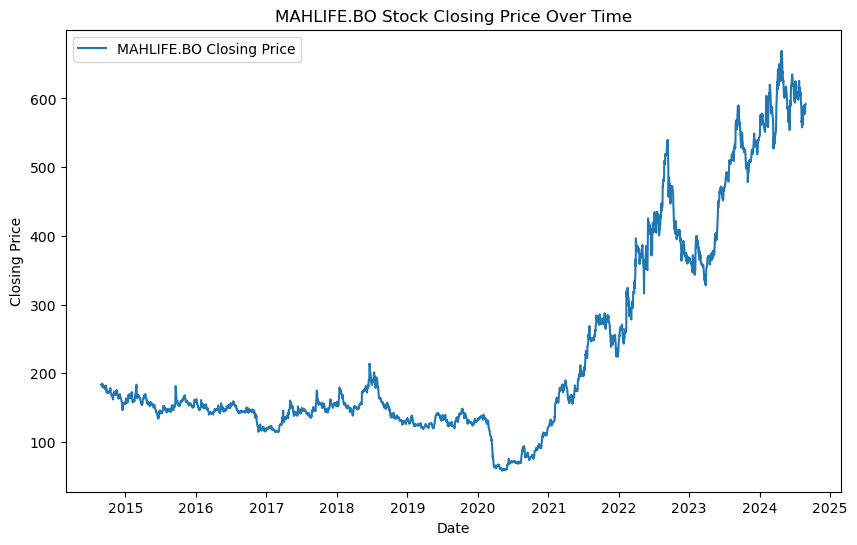

==================== ADANIGREEN.BO Summary Statistics ====================

          Open     High      Low    Close  Adj Close       Volume
count  1507.00  1507.00  1507.00  1507.00    1507.00      1507.00
mean    972.97   992.41   949.39   969.85     969.85    230391.57
std     772.83   788.74   752.92   768.99     768.99   1656962.67
min      24.65    26.35    22.75    25.05      25.05      4020.00
25%     136.85   139.00   134.72   137.47     137.47     37739.00
50%     976.40   989.75   955.00   972.50     972.50     74541.00
75%    1738.20  1780.00  1701.38  1730.90    1730.90    165822.50
max    3037.00  3048.00  2850.00  2968.10    2968.10  48320150.00




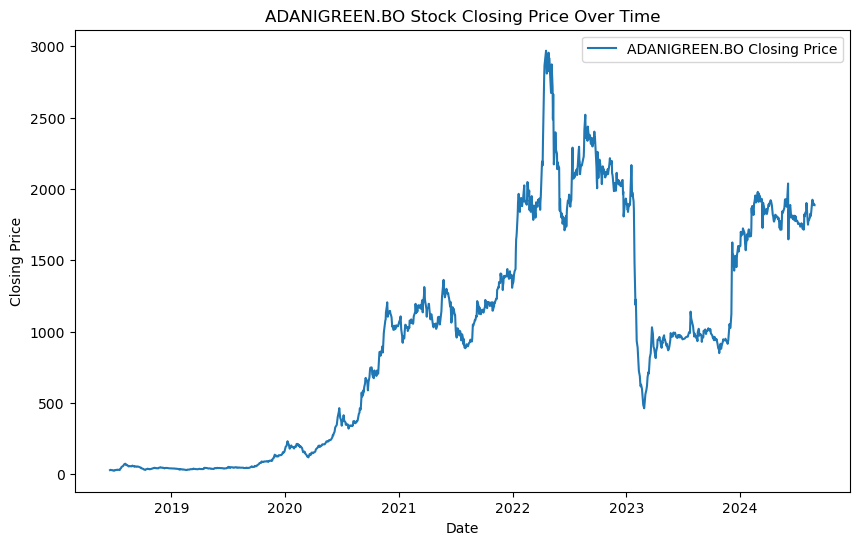

In [49]:
# Loop through each stock DataFrame in the stocks list and print the describe output
for stock_df in stocks:
    company_name = stock_df['company_name'].iloc[0]
    
    print(f"{'='*20} {company_name} Summary Statistics {'='*20}\n")
    print(stock_df.describe().round(2))  # Round the output for a cleaner look
    print("\n" + "="*60 + "\n")  # Add separation between outputs
    
    # Optional: Plotting the closing price to visualize the trend
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Close'], label=f"{company_name} Closing Price")
    plt.title(f"{company_name} Stock Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.show()


## Volume of Sales¶

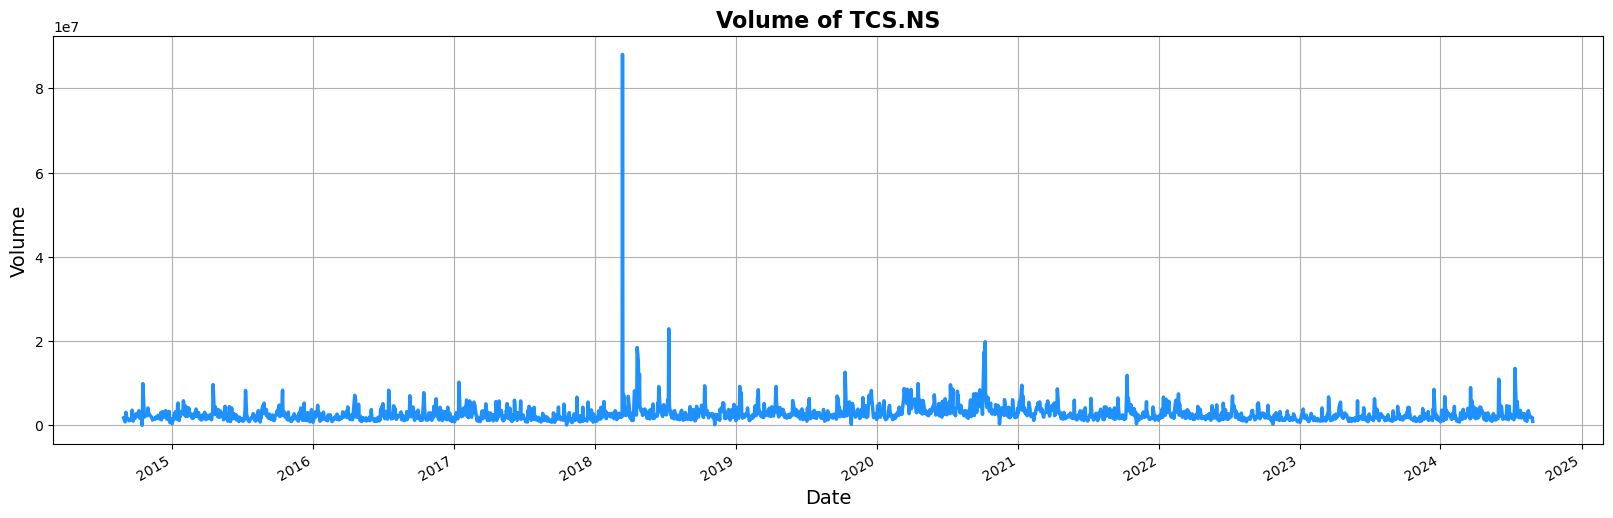

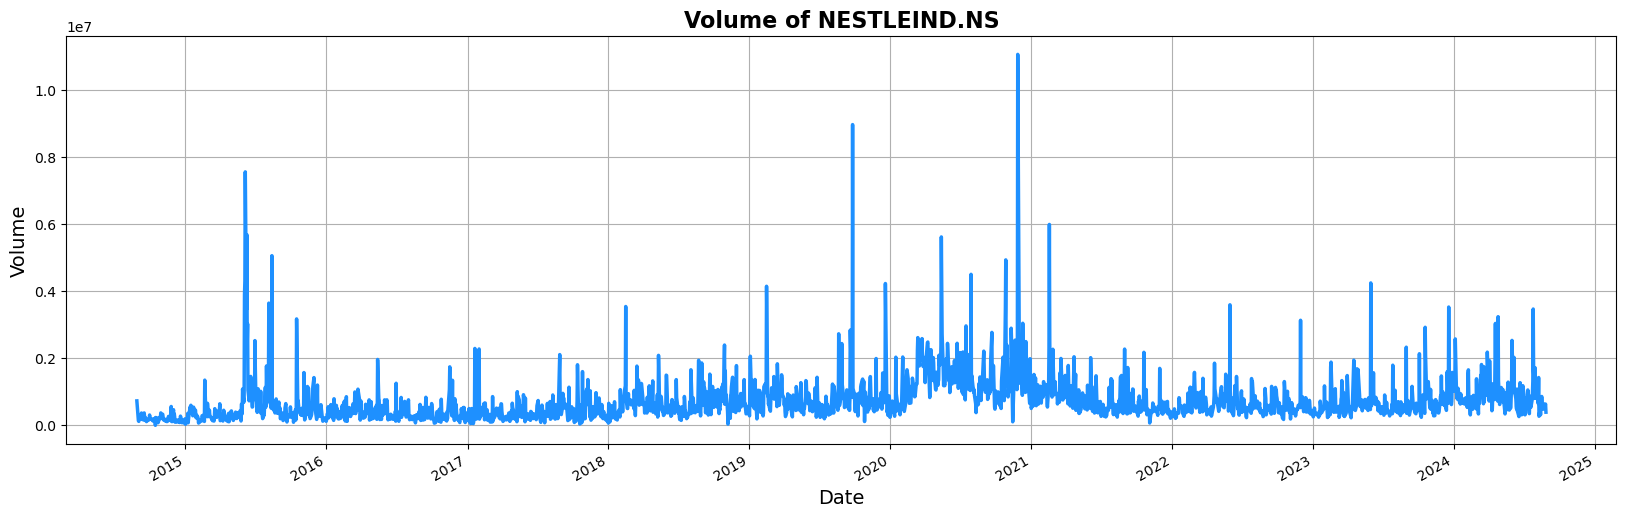

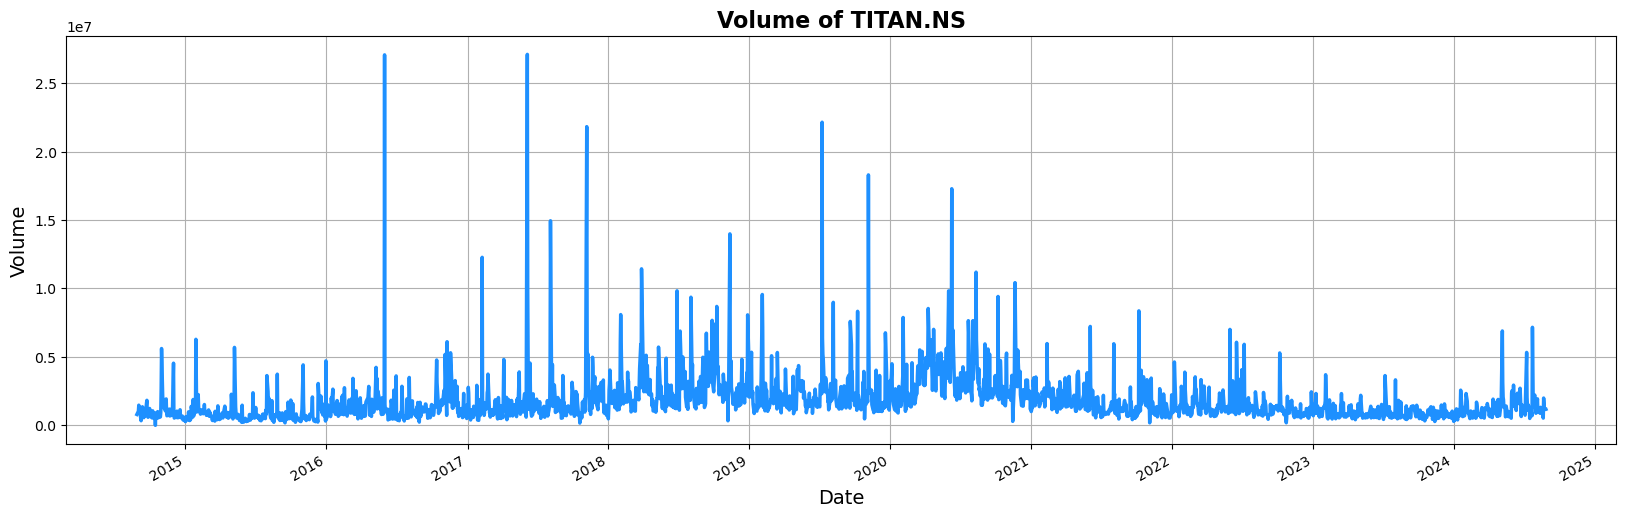

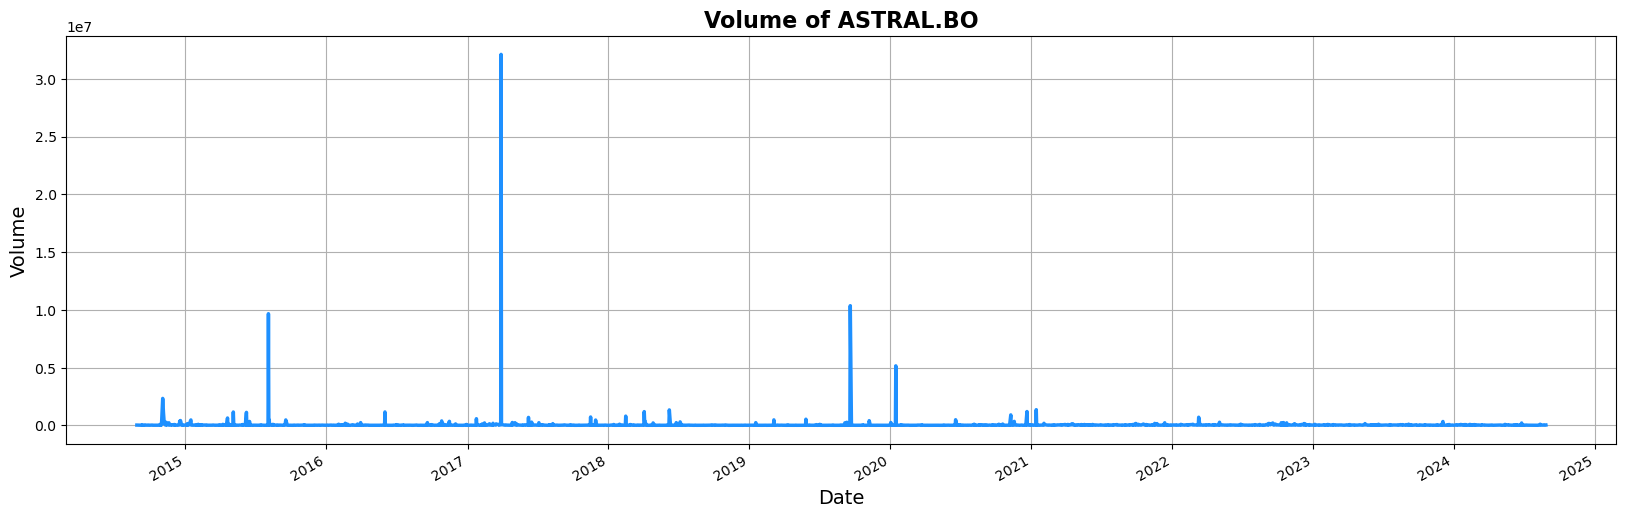

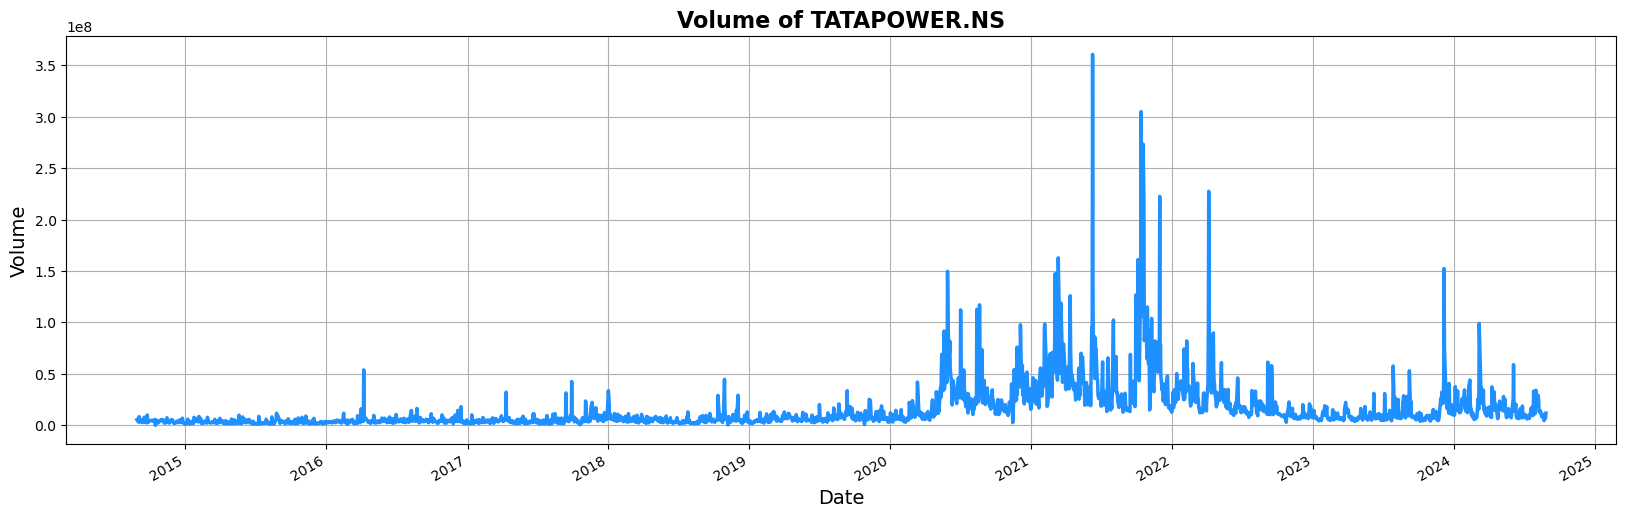

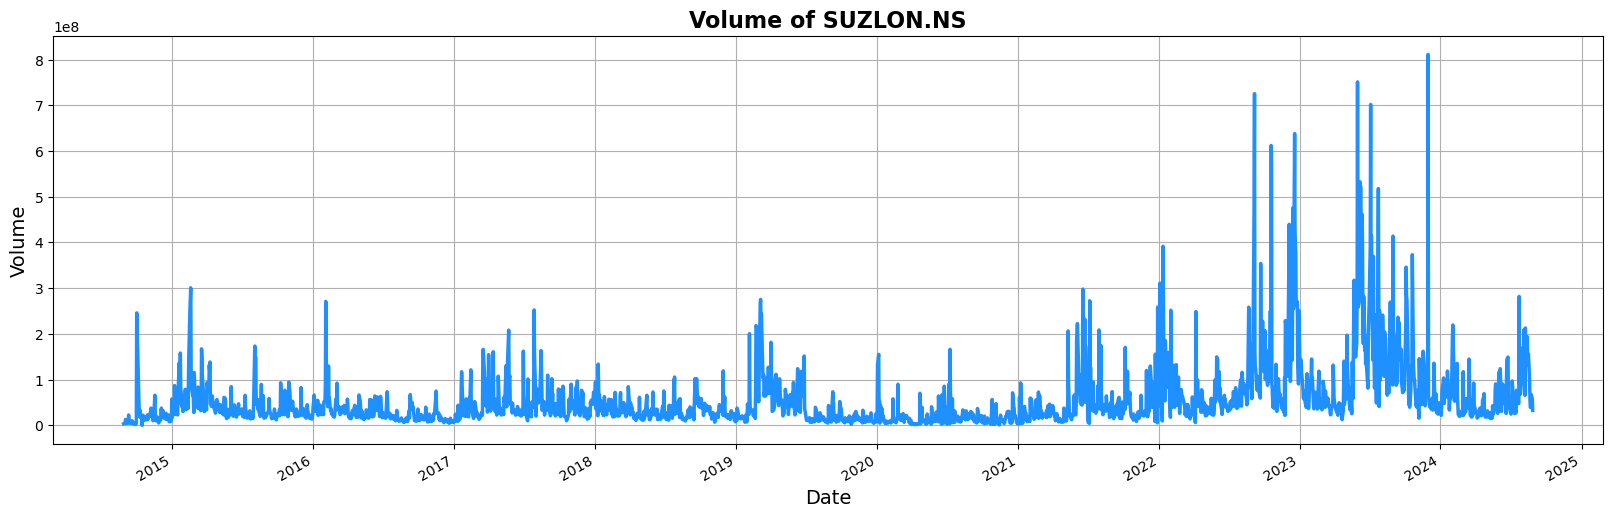

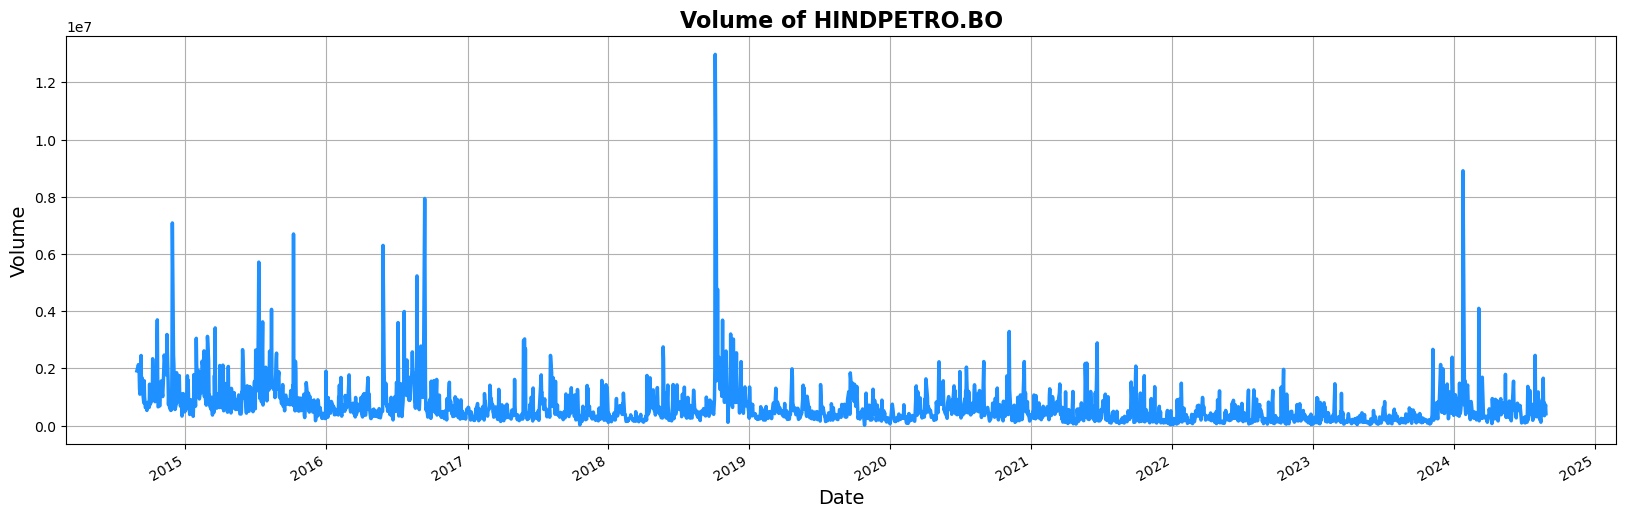

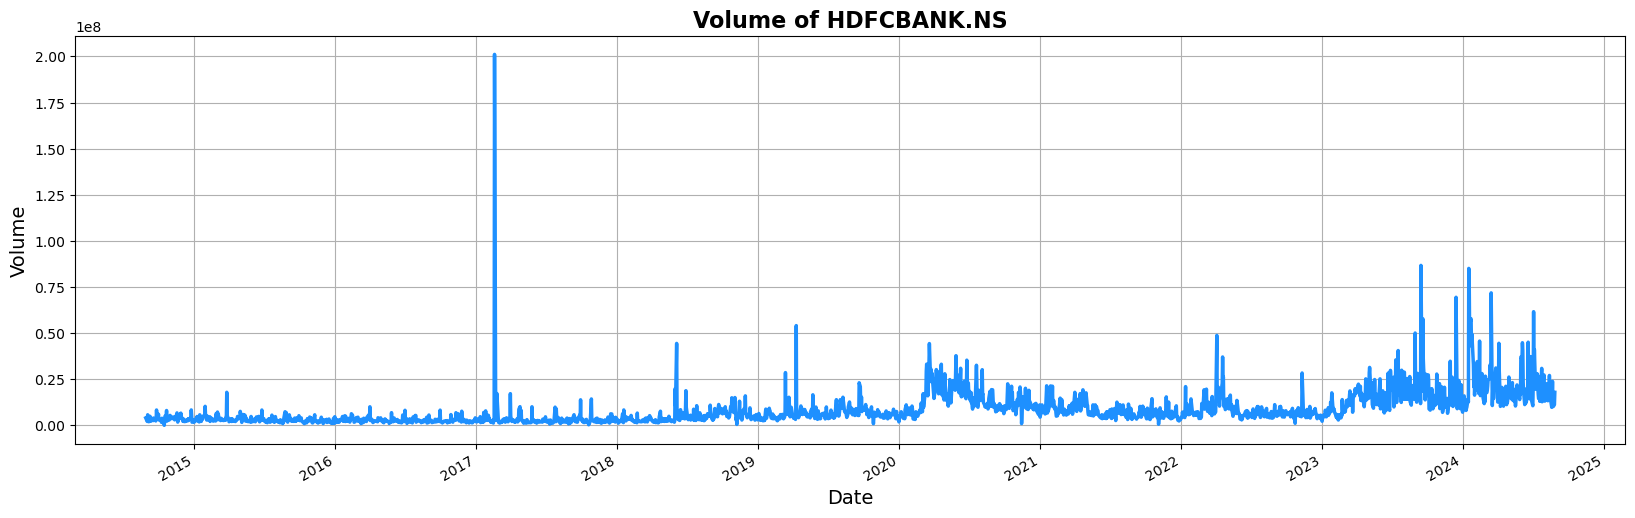

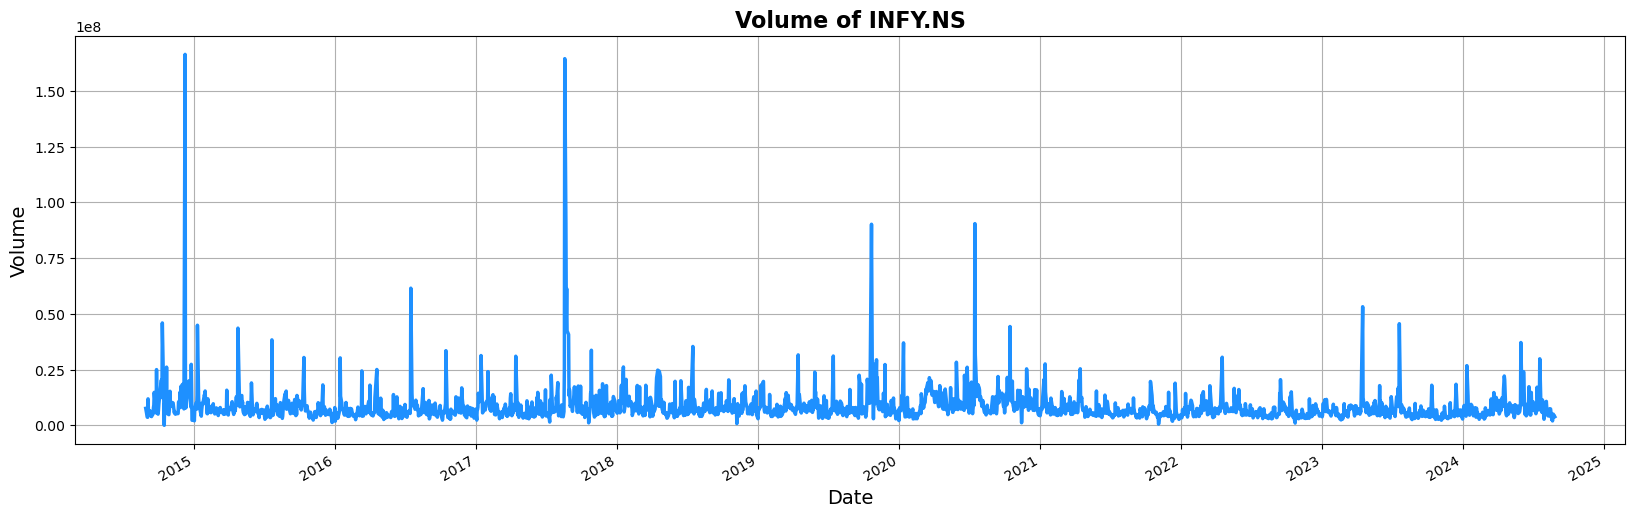

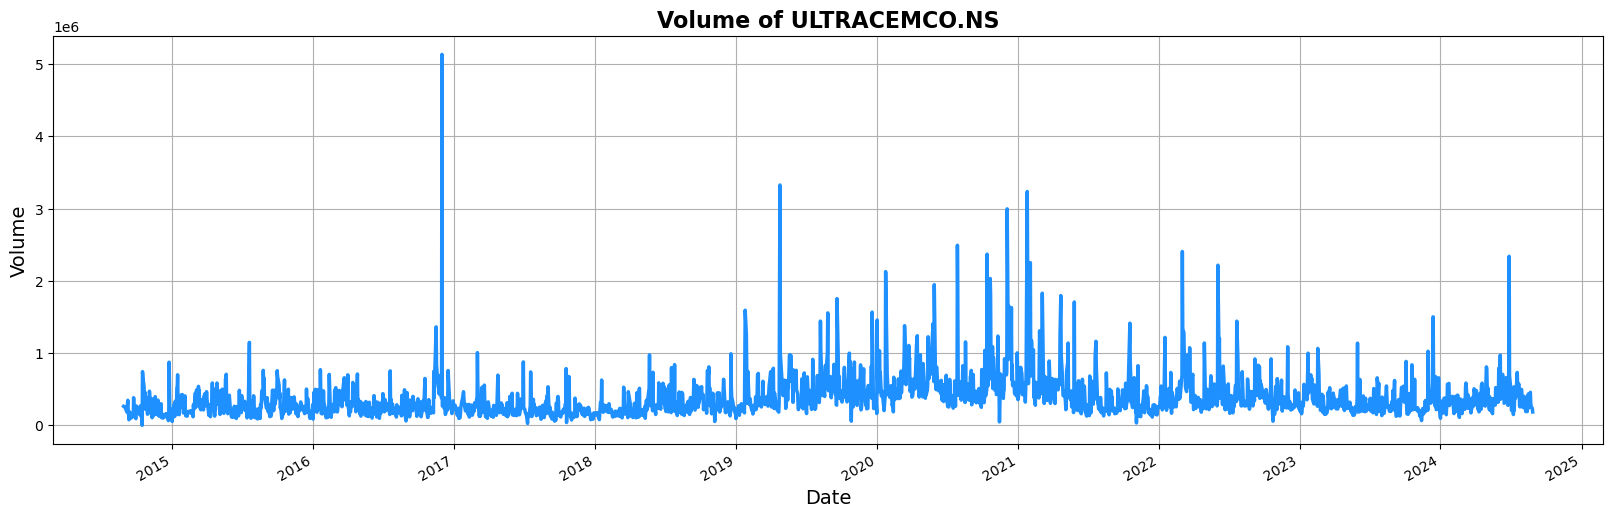

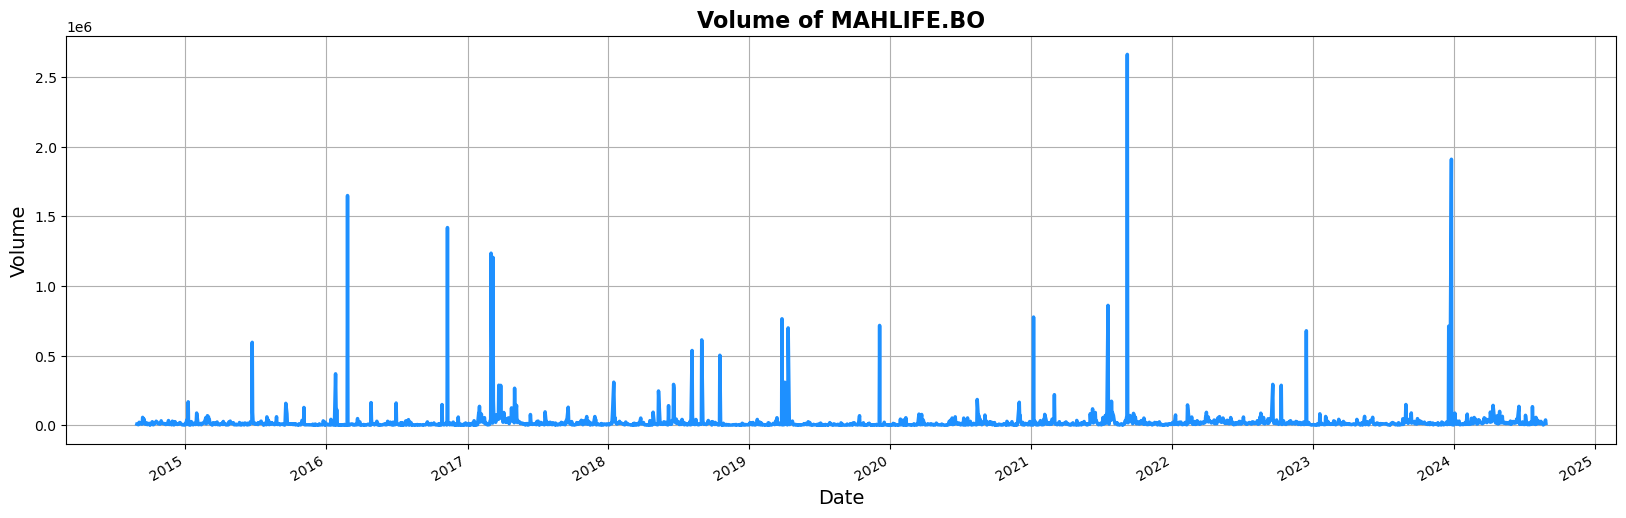

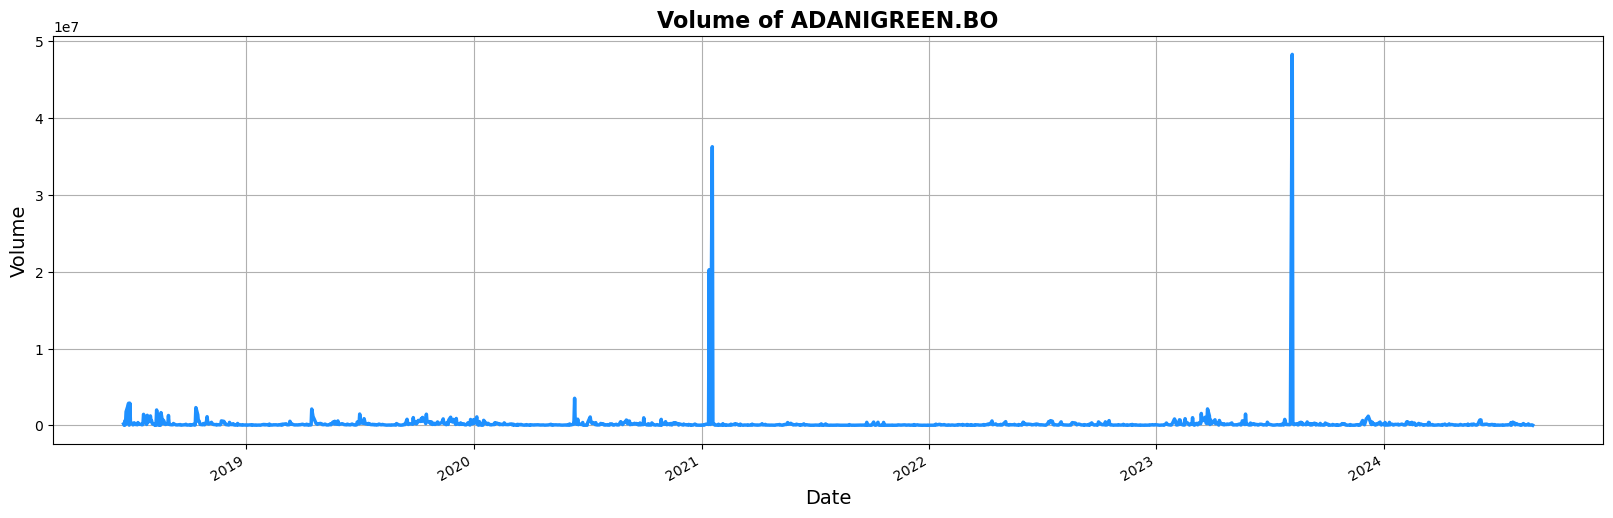

In [50]:
# Loop through the list of DataFrames and plot each stock's volume
for i, stock_data in enumerate(stocks):
    plt.figure(figsize=(20, 6))  # Customize the size of each plot for better visibility
    stock_data['Volume'].plot(color='dodgerblue', linewidth=2.5)  # Thicker line for better visibility
    plt.ylabel('Volume', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.title(f"Volume of {stock_data['company_name'].iloc[0]}", fontsize=16, fontweight='bold')  # Larger, bold title
    plt.grid(True)  # Add gridlines for better readability
    
    plt.show()  # Display each plot individually


## Moving Average

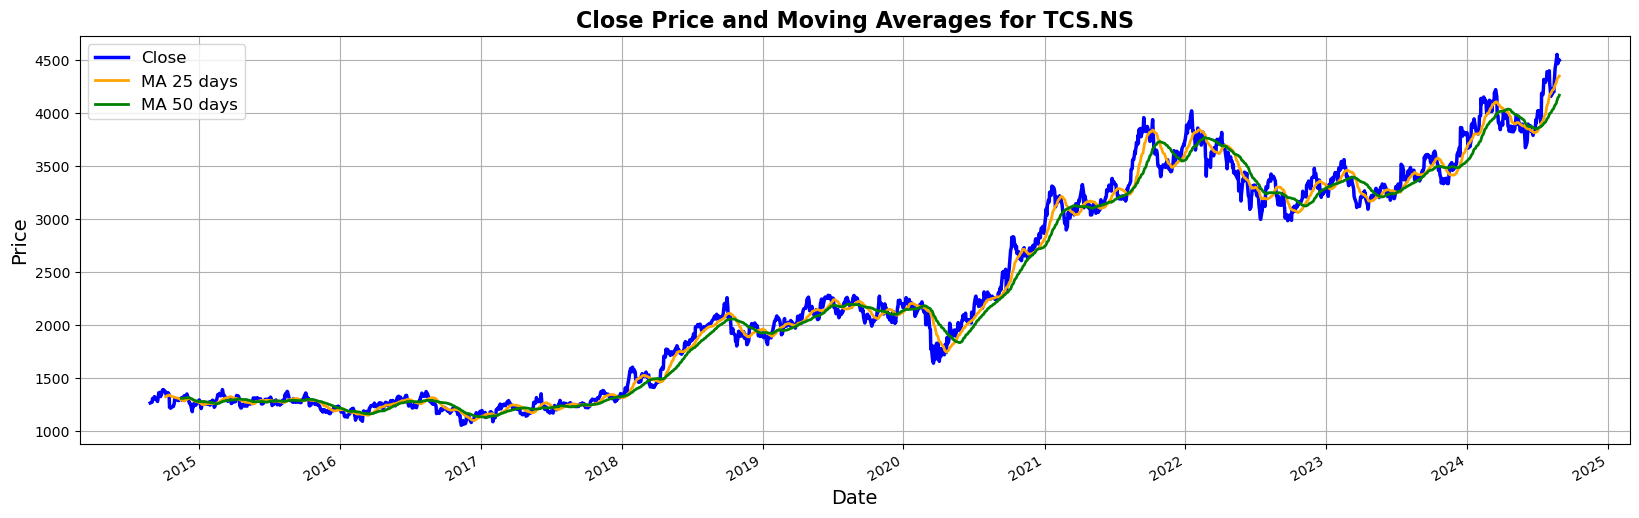

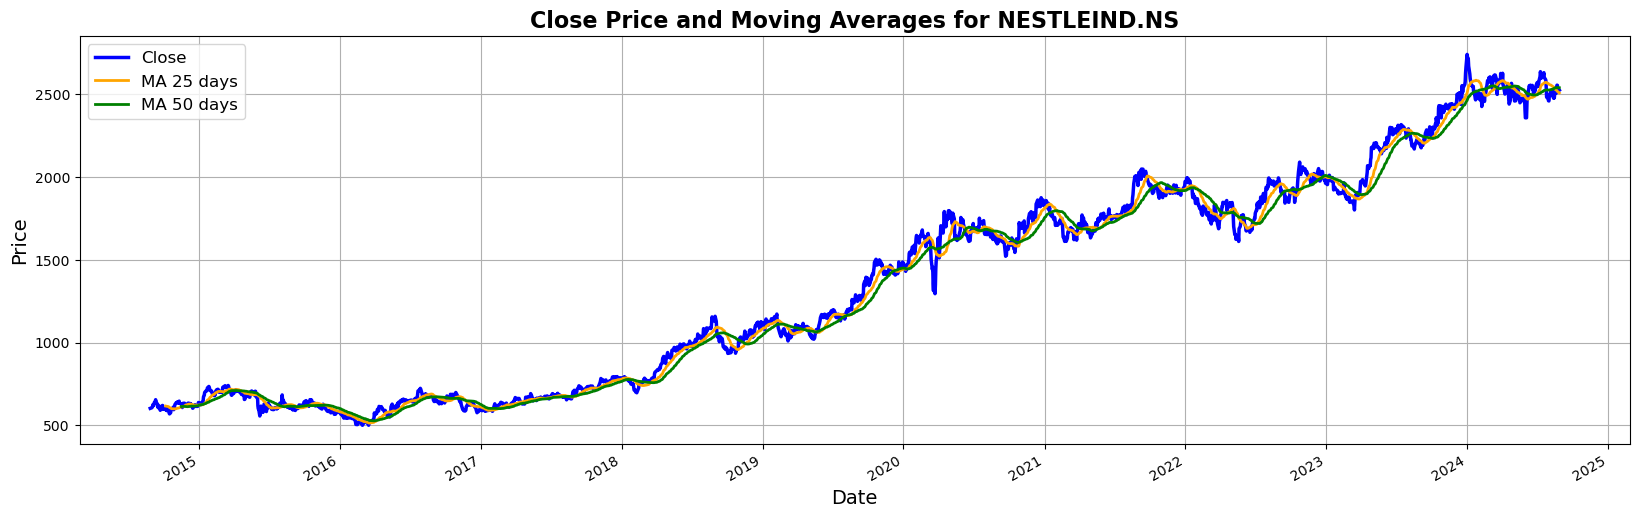

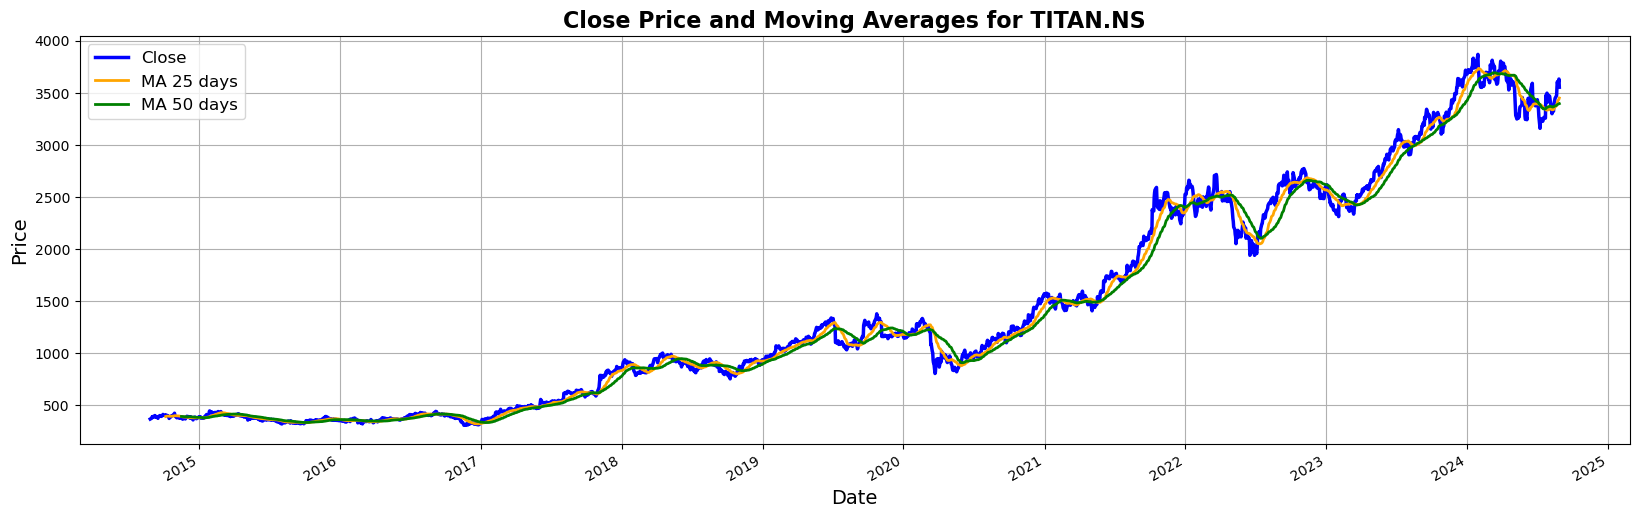

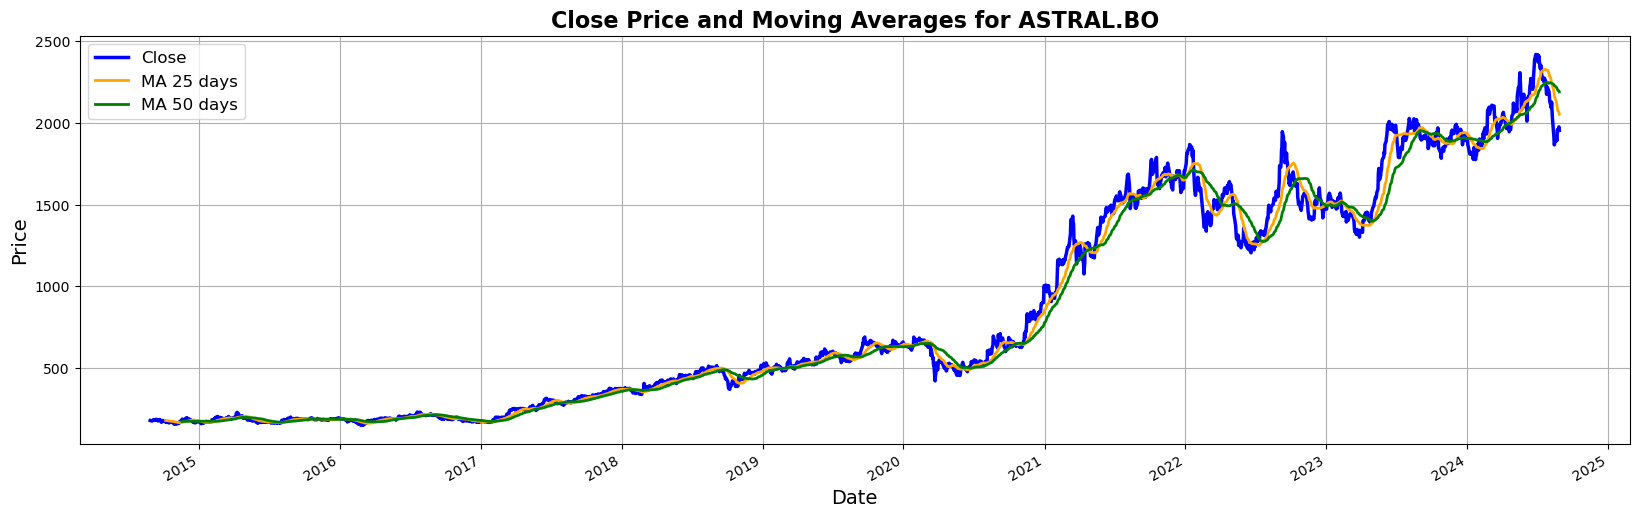

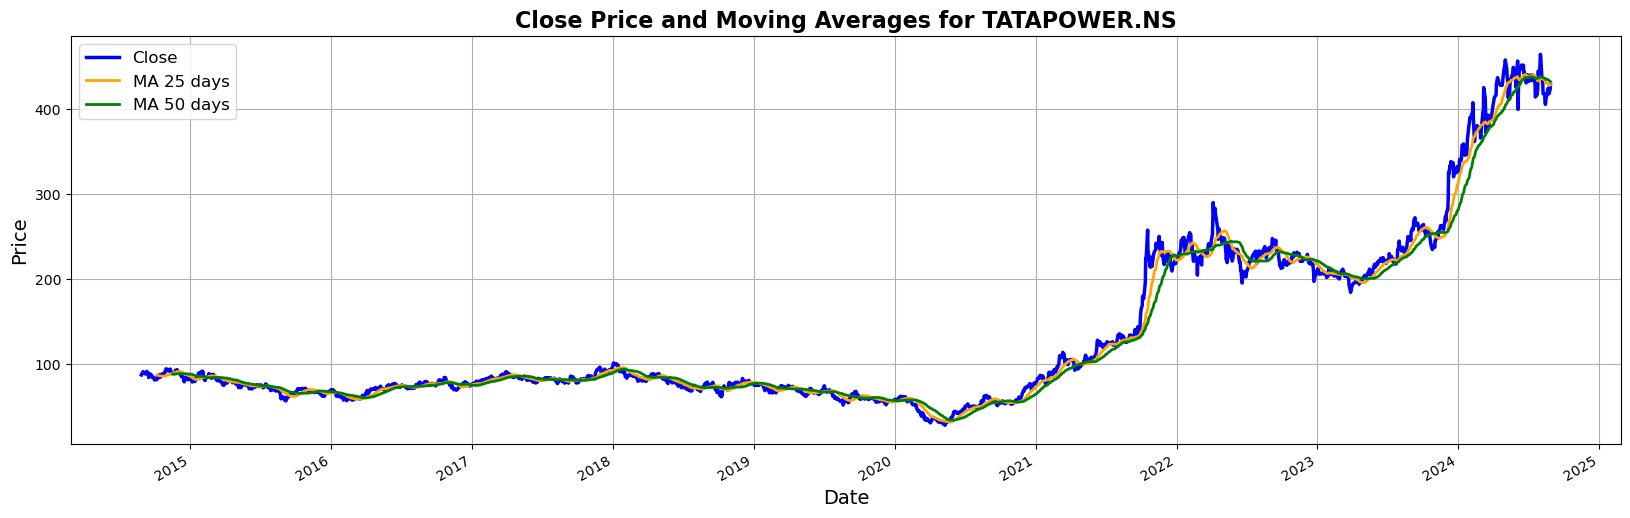

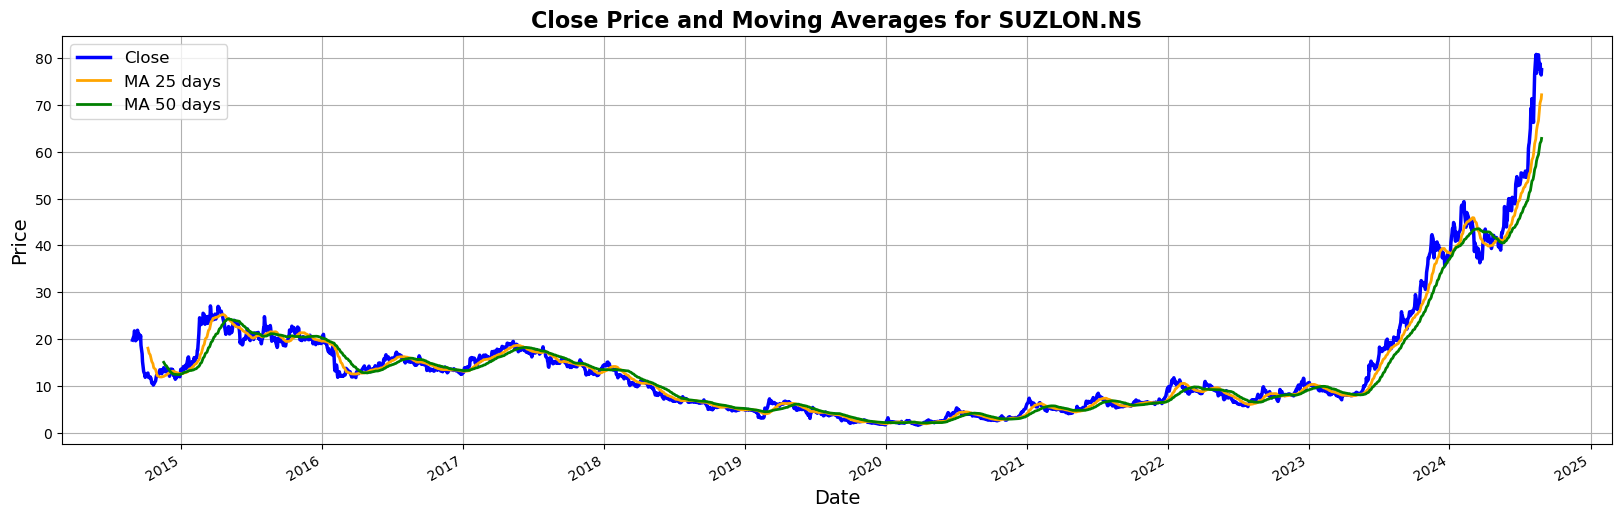

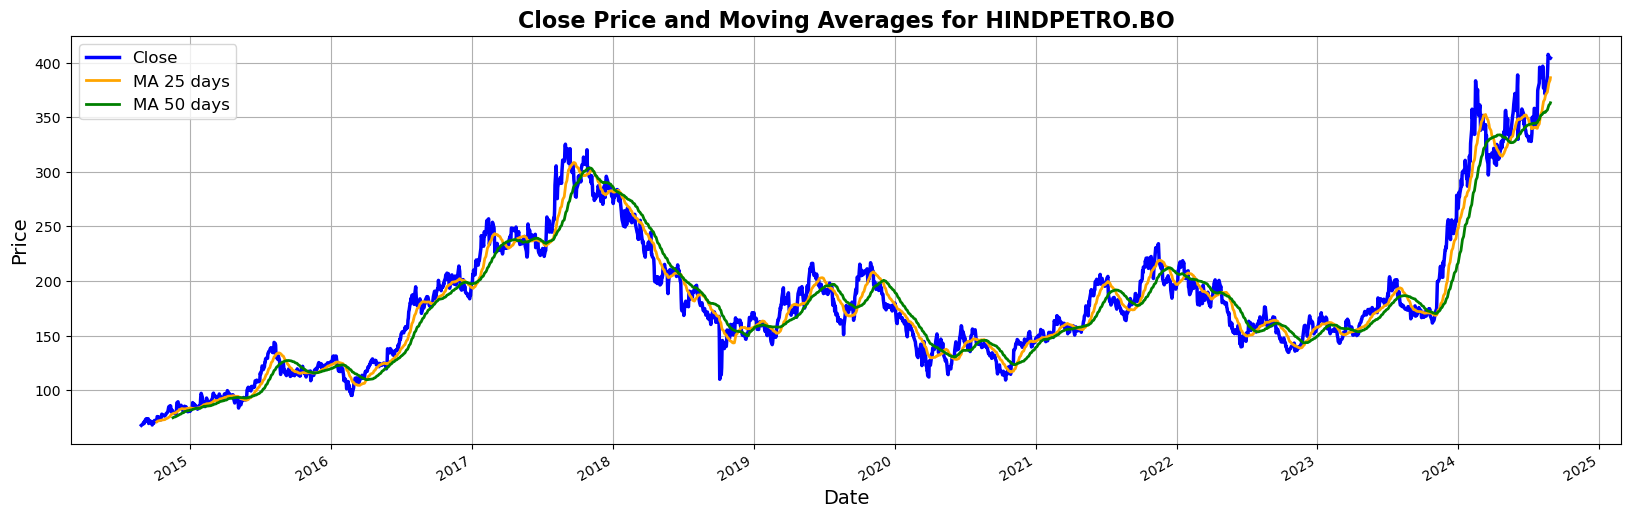

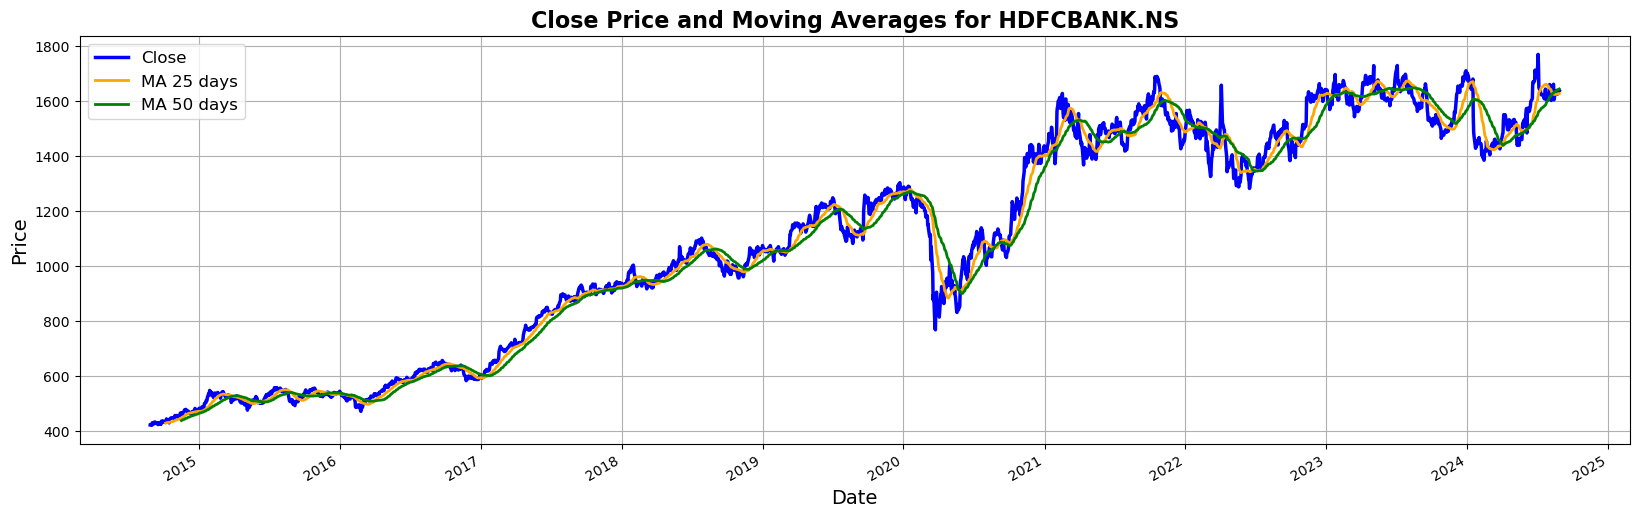

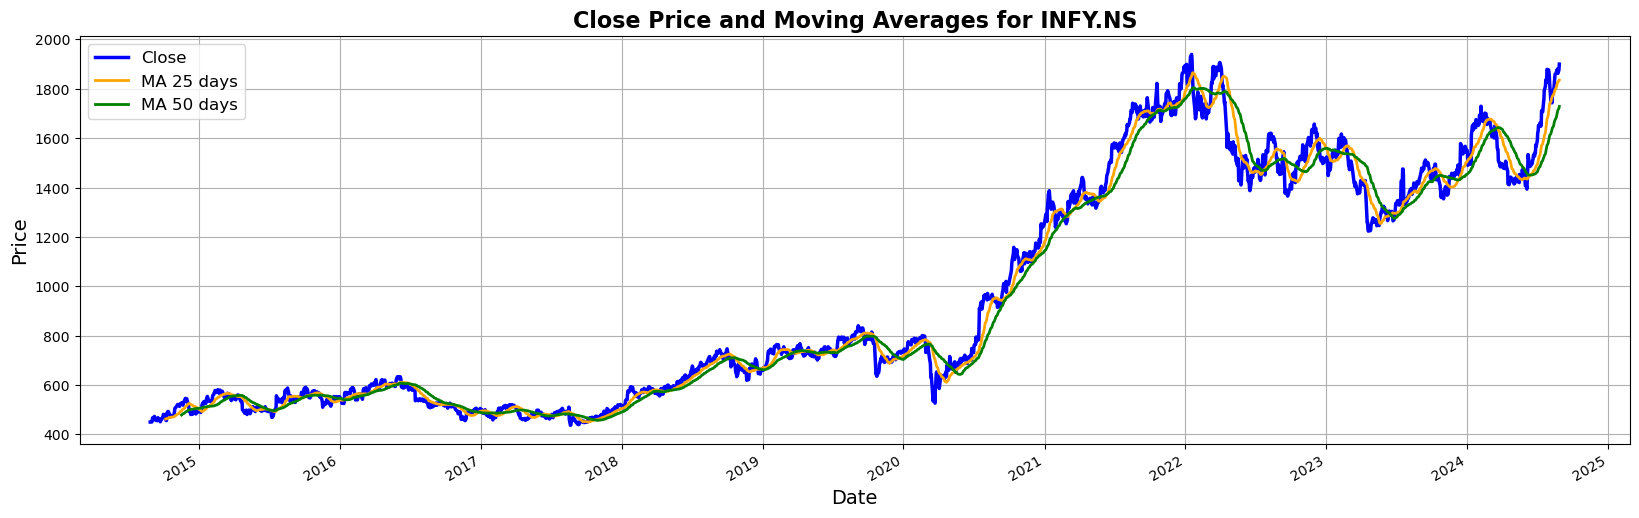

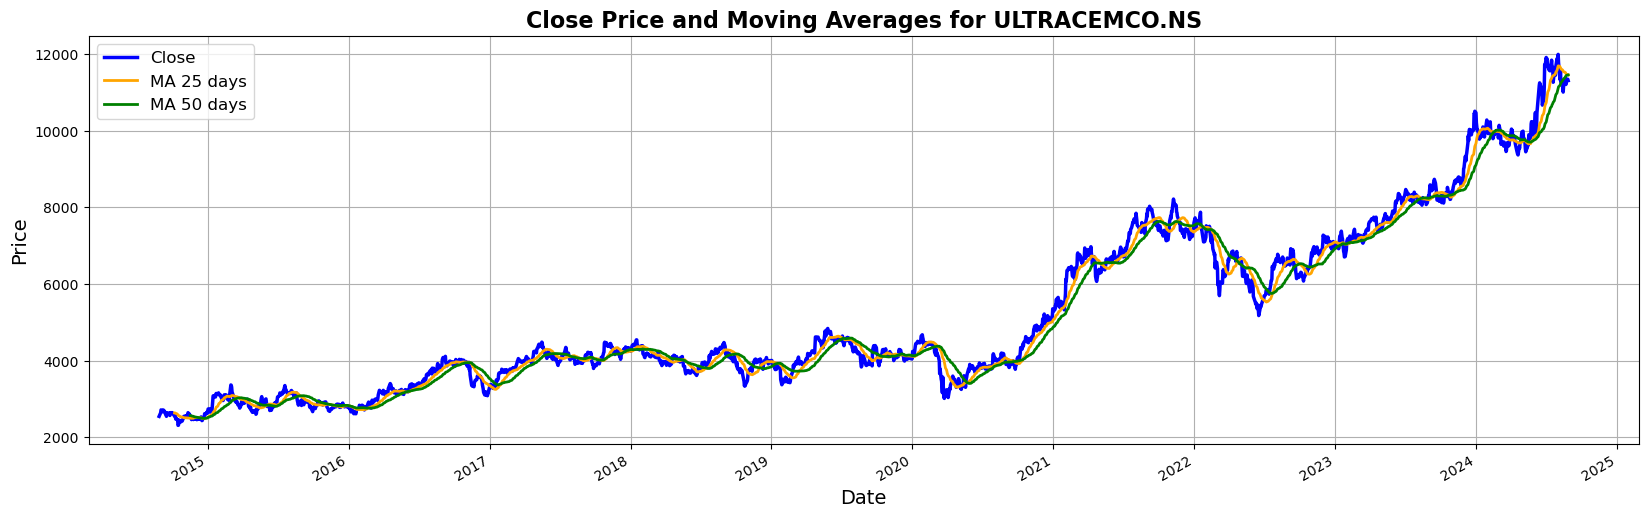

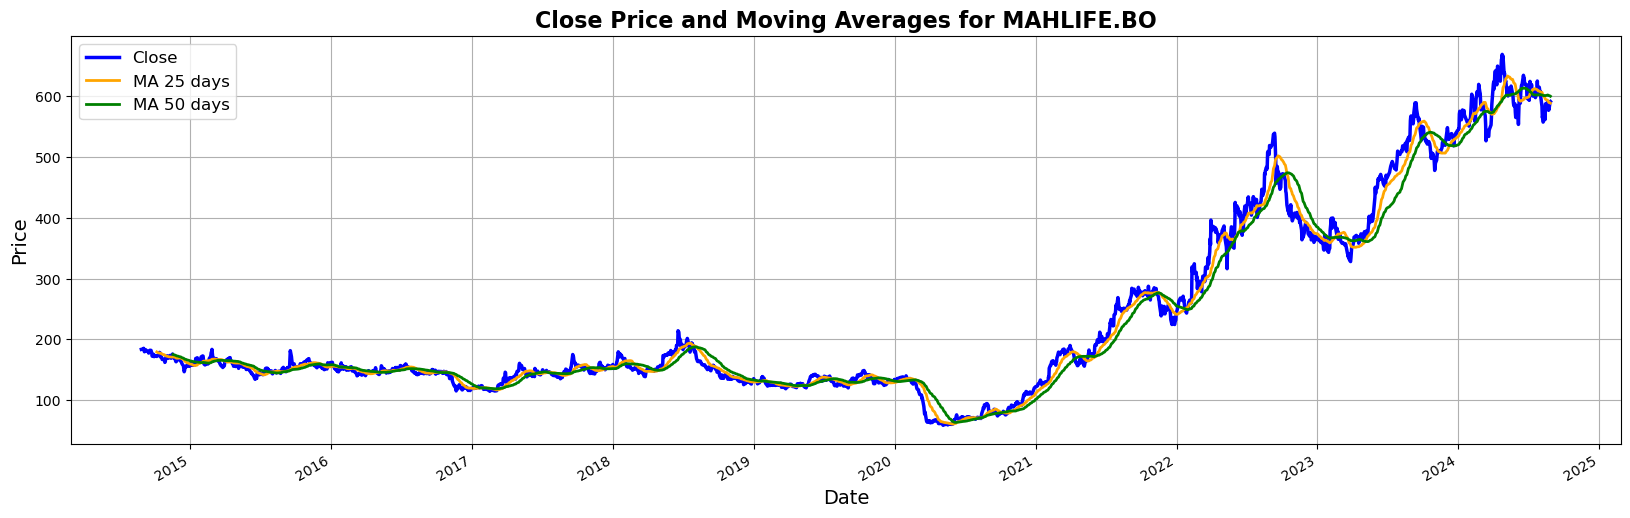

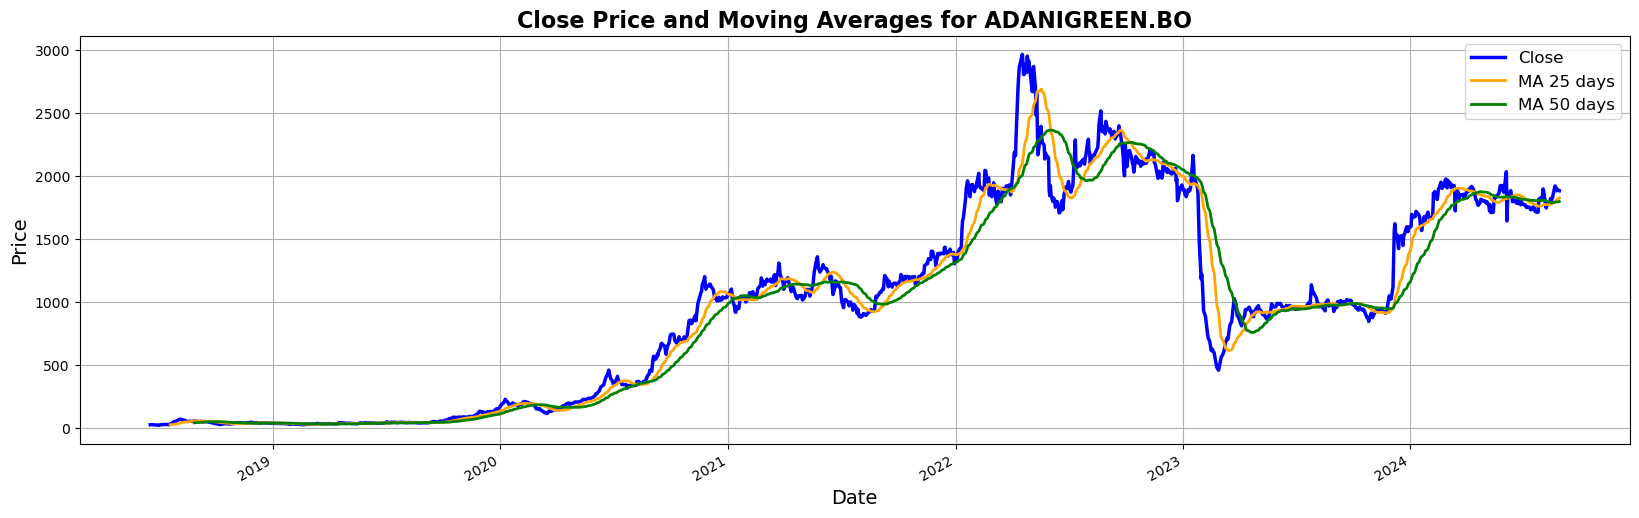

In [51]:
# Define colors for the moving averages
ma_days = [25,50]
colors = {
    25: 'orange',  # Color for MA25
    50: 'green'    # Color for MA50
}

# Calculate moving averages and add them to each DataFrame in the list
for ma in ma_days:
    for stock_data in stocks:
        stock_data[f"MA for {ma} days"] = stock_data['Close'].rolling(ma).mean()

# Loop through the list of DataFrames and plot the closing price and moving averages
for i, stock_data in enumerate(stocks):
    plt.figure(figsize=(20, 6))  # Larger figure size for better visibility
    stock_data['Close'].plot(label='Close', color='blue', linewidth=2.5)  # Close price in blue
    for ma in ma_days:
        stock_data[f"MA for {ma} days"].plot(label=f'MA {ma} days', color=colors[ma], linewidth=2)  # Moving averages with custom colors
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.title(f"Close Price and Moving Averages for {stock_data['company_name'].iloc[0]}", fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True)  # Add gridlines for better readability
    
    plt.show()  # Display each plot individually


## Risk VS Return

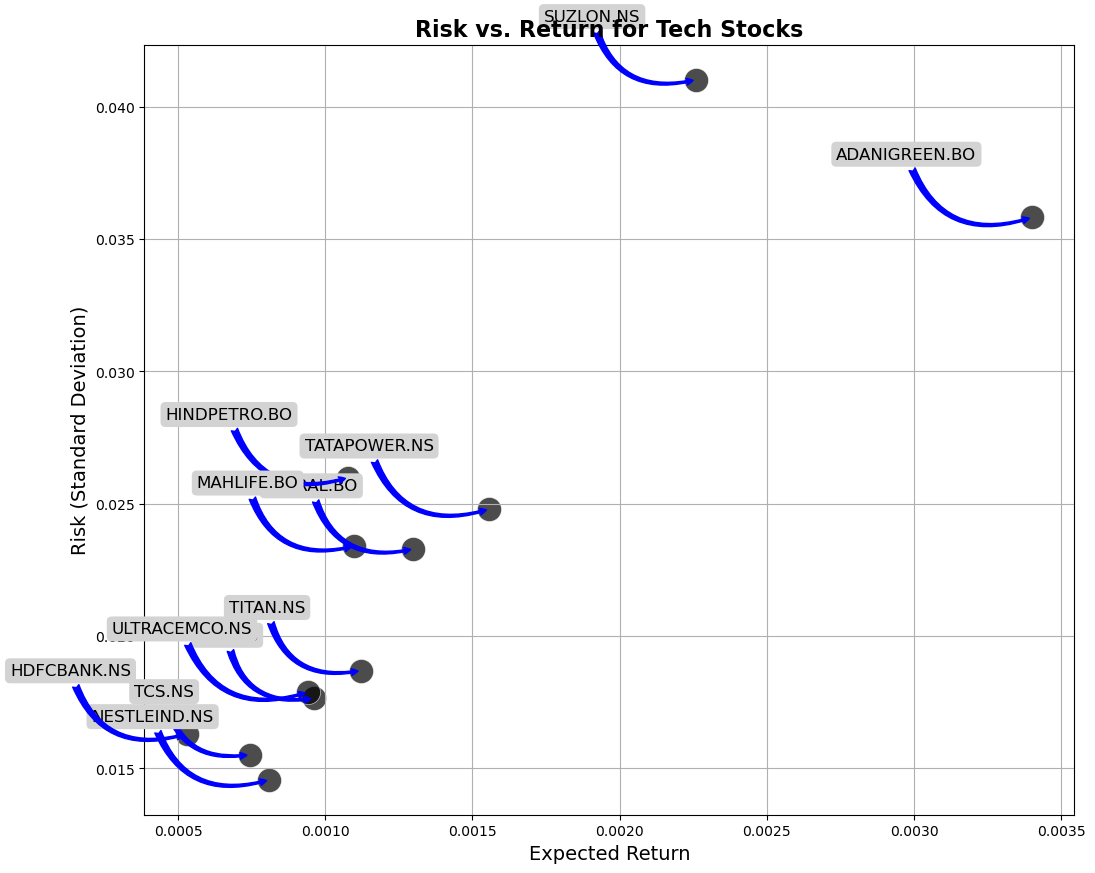

In [52]:
returns_df = pd.DataFrame()

# Calculate daily returns and store them in the returns_df
for stock_data in stocks:
    stock_name = stock_data['company_name'].iloc[0]
    returns_df[stock_name] = stock_data['Adj Close'].pct_change()

# Drop missing values from returns_df
returns_df = returns_df.dropna()

# Calculate mean returns and standard deviation (risk)
mean_returns = returns_df.mean()
std_dev = returns_df.std()

# Plot the risk vs. return scatter plot
plt.figure(figsize=(12, 10))  # Larger figure size for better visibility

# Scatter plot with larger, black circles
plt.scatter(mean_returns, std_dev, s=300, color='black', alpha=0.7, edgecolors='w', linewidth=0.5)  # Larger circles

# Add labels and annotations
plt.xlabel('Expected Return', fontsize=14)
plt.ylabel('Risk (Standard Deviation)', fontsize=14)
plt.title('Risk vs. Return for Tech Stocks', fontsize=16, fontweight='bold')

for label, x, y in zip(returns_df.columns, mean_returns, std_dev):
    # Calculate position for annotation
    offset_x = 40 if x < 0 else -40  # Dynamic offset based on x position to avoid overlap
    offset_y = 40  # Fixed vertical offset
    # Annotate with thinner, curvy arrows
    plt.annotate(label, xy=(x, y), xytext=(x + offset_x, y + offset_y), textcoords='offset points',
                 ha='right', va='bottom', fontsize=12,
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgrey'),
                 arrowprops=dict(arrowstyle='fancy', color='blue', lw=1, connectionstyle='arc3,rad=0.5'))  # Thinner arrows

plt.grid(True)
plt.show()


## Now we will predict price of TCS 

In [53]:
predicted_prices_list = []
previous_close_prices_list = []


In [54]:
df = stocks[0]
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-08-28  1273.500000  1274.650024  1256.500000  1261.175049  1040.315430   
2014-09-01  1262.699951  1280.000000  1261.525024  1268.574951  1046.419800   
2014-09-02  1272.900024  1277.400024  1257.050049  1268.949951  1046.728882   
2014-09-03  1269.500000  1308.000000  1269.500000  1303.199951  1074.981079   
2014-09-04  1311.000000  1313.724976  1288.724976  1292.375000  1066.051636   
...                 ...          ...          ...          ...          ...   
2024-08-21  4518.000000  4560.000000  4492.549805  4551.500000  4551.500000   
2024-08-22  4560.000000  4560.950195  4497.200195  4502.000000  4502.000000   
2024-08-23  4500.000000  4506.000000  4455.000000  4463.899902  4463.899902   
2024-08-26  4489.000000  4552.149902  4485.000000  4502.450195  4502.450195   
2024-08-27  4505.000000  4510.000000  4486.799805  4497.149902  4497.149902   

             Volume company_name  MA for 25 days  MA for 50 days  
Date                                                              
2014-08-28  1766288       TCS.NS             NaN             NaN  
2014-09-01   810148       TCS.NS             NaN             NaN  
2014-09-02  1407940       TCS.NS             NaN             NaN  
2014-09-03  3061690       TCS.NS             NaN             NaN  
2014-09-04  1701598       TCS.NS             NaN             NaN  
...             ...          ...             ...             ...  
2024-08-21  1896990       TCS.NS     4312.454004     4115.730000  
2024-08-22  1829872       TCS.NS     4325.395996     4128.596001  
2024-08-23  1809253       TCS.NS     4331.330000     4140.831997  
2024-08-26  1844164       TCS.NS     4339.332012     4154.248003  
2024-08-27   930667       TCS.NS     4347.724004     4166.628003  

[2462 rows x 9 columns]

## Creating training and validation set

In [55]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2339

### Scaling 

In [56]:

# Assuming you have already fitted the scaler on your training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [57]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


## Model Training using LSTM

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
'''
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
'''
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - loss: 0.0021


## Error Calculations

In [59]:
test_data = scaled_data[training_data_len - 100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


100.3839344158809

C:\Users\dell\AppData\Local\Temp\ipykernel_8684\634414014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


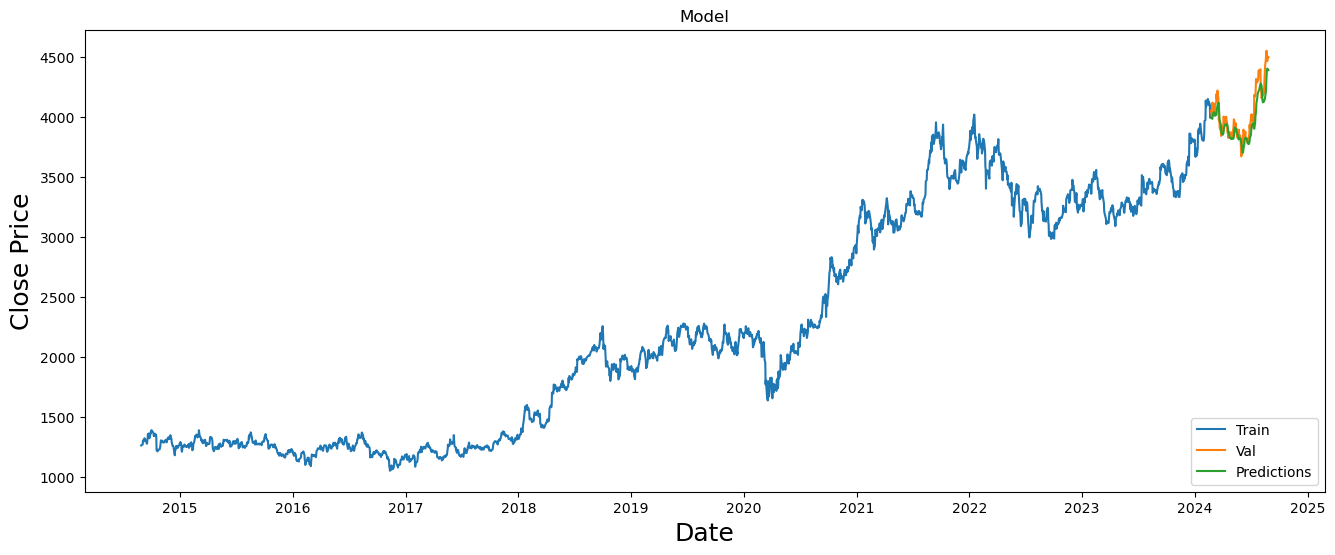

In [60]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
valid = valid.rename(columns={
    'Close': 'Actual Price',
    'Predictions': 'Predicted Price'
})

### Price Prediction for next day

In [62]:


# Load the scaler from the file
scaler = joblib.load('scaler.pkl')

# Assuming `df` is your DataFrame with historical data including 'Close' prices
# Scale the data
scaled_data = scaler.transform(df[['Close']])

# Extract the last 100 days of data
last_100_days = scaled_data[-100:]

# Prepare the last 100 days data for prediction
last_100_days = np.reshape(last_100_days, (1, last_100_days.shape[0], 1))

# Predict the next day's price
future_pred = model.predict(last_100_days)
future_pred = scaler.inverse_transform(future_pred)  # Inverse transform to get the original scale

# Print the predicted price for the next day
print(f"The predicted price for the next day is: {future_pred[0, 0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The predicted price for the next day is: 4385.52


## Trends Capturing

In [64]:
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Make a copy of valid

# Assign predictions
valid['Predictions'] = predictions

#Calculate trends and matching trends for the last 50 rows
valid['Close_Trend'] = valid['Close'].diff().apply(lambda x: 1 if x > 0 else 0)
valid['Prediction_Trend'] = valid['Predictions'].diff().apply(lambda x: 1 if x > 0 else 0)
    
# Focus only on the last 50 rows
valid_last_50 = valid.tail(50)
valid_last_50['Trend_Same'] = (valid_last_50['Close_Trend'] == valid_last_50['Prediction_Trend']).astype(int)
    
# Count matching trends for the last 50 rows
same_trend_count_last_50 = valid_last_50['Trend_Same'].sum()

# Print the trimmed valid DataFrame
print(f"\n{'='*50}\nLast 50 rows for {stock_name}:\n")
print(tabulate(valid_last_50, headers='keys', tablefmt='fancy_grid'))

# Display the number of matching trends for the last 50 rows
print(f"\nNumber of matching trends for the last 50 rows of {stock_name}: {same_trend_count_last_50}")



Last 50 rows for ADANIGREEN.BO:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 3832.05 │       3825.97 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 3815.1  │       3820.02 │             0 │                  0 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 3801.7  │       3807.91 │             0 │                  0 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-20 00:00:00 │ 3787.25 │       3793.58 

C:\Users\dell\AppData\Local\Temp\ipykernel_8684\3073871778.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_last_50['Trend_Same'] = (valid_last_50['Close_Trend'] == valid_last_50['Prediction_Trend']).astype(int)


## Analysing each stock in list

Processing stock: TCS.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - loss: 0.0023
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
RMSE for TCS.NS: 295.8705

Last 50 rows for TCS.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 3832.05 │       3612.18 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 3815.1  │       3608.8  │             0 │                  0 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 3801.7  │       3598.77 │             0 │                  0 │            1 │
├─────────────────────┼─────────

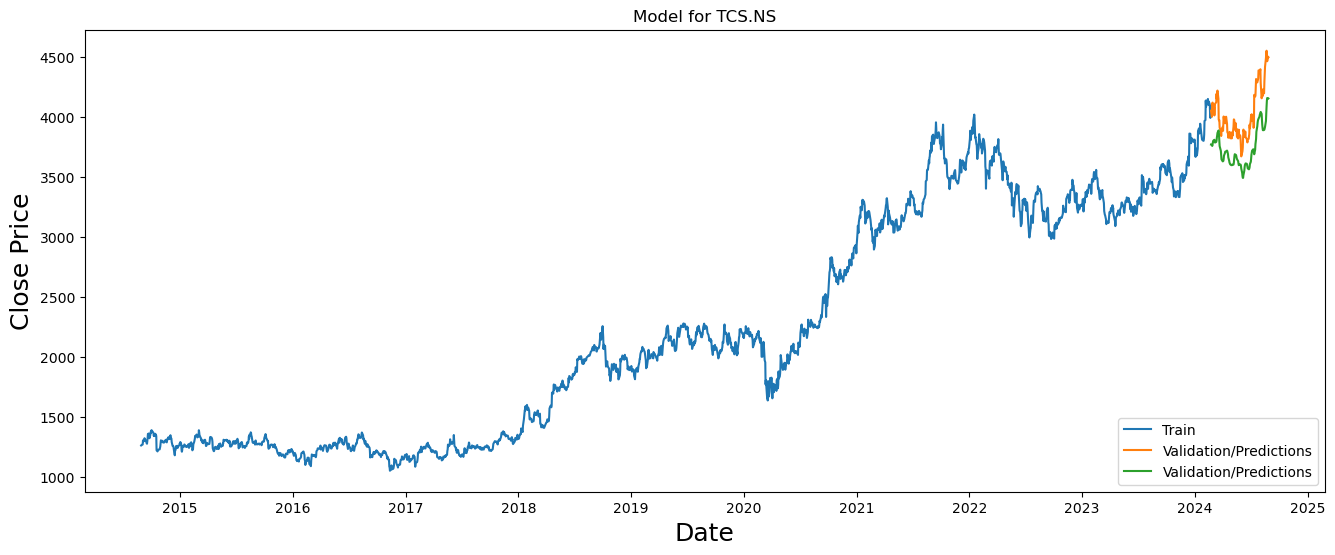

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing stock: NESTLEIND.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 71s 30ms/step - loss: 0.0043
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
RMSE for NESTLEIND.NS: 71.4574

Last 50 rows for NESTLEIND.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 2542.5  │       2472.39 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 2550.35 │       2480.64 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 2526.05 │       2485.98 │             0 │                  1 │            0 │
├────────────────────

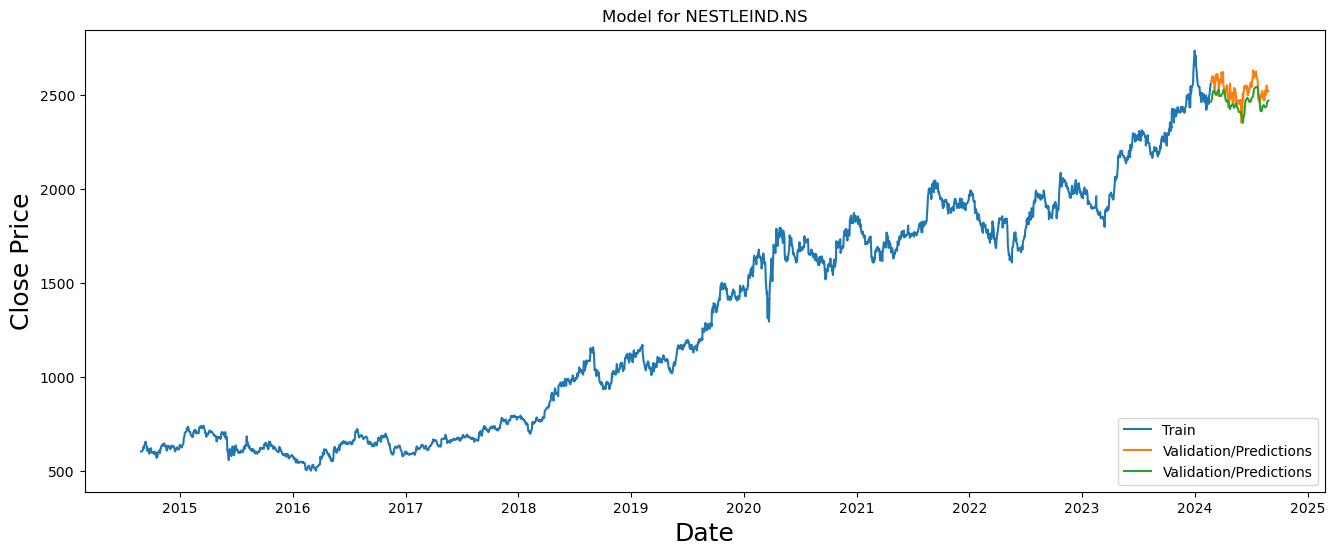

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing stock: TITAN.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - loss: 0.0023
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
RMSE for TITAN.NS: 100.9311

Last 50 rows for TITAN.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 3530.05 │       3351.69 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 3589    │       3380.4  │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 3462.35 │       3417.36 │             0 │                  1 │            0 │
├─────────────────────┼─────

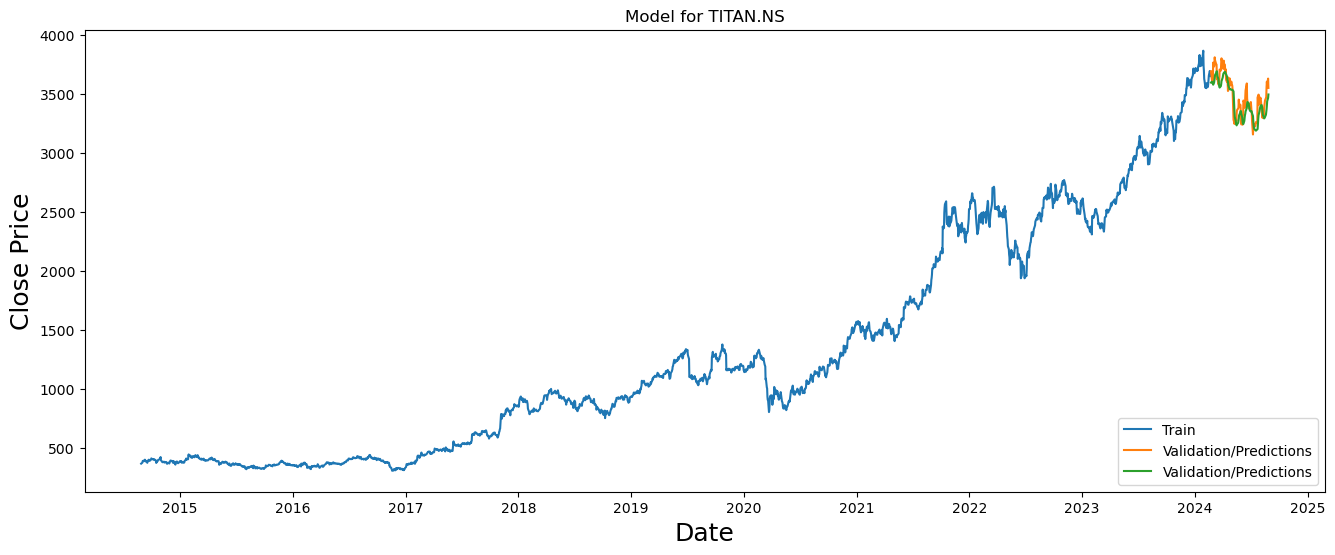

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing stock: ASTRAL.BO


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2223/2223 ━━━━━━━━━━━━━━━━━━━━ 71s 30ms/step - loss: 0.0018
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
RMSE for ASTRAL.BO: 156.3269

Last 50 rows for ASTRAL.BO:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 2269.15 │       2054.06 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 2257.7  │       2074.86 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 2203.1  │       2087.29 │             0 │                  1 │            0 │
├─────────────────────┼───

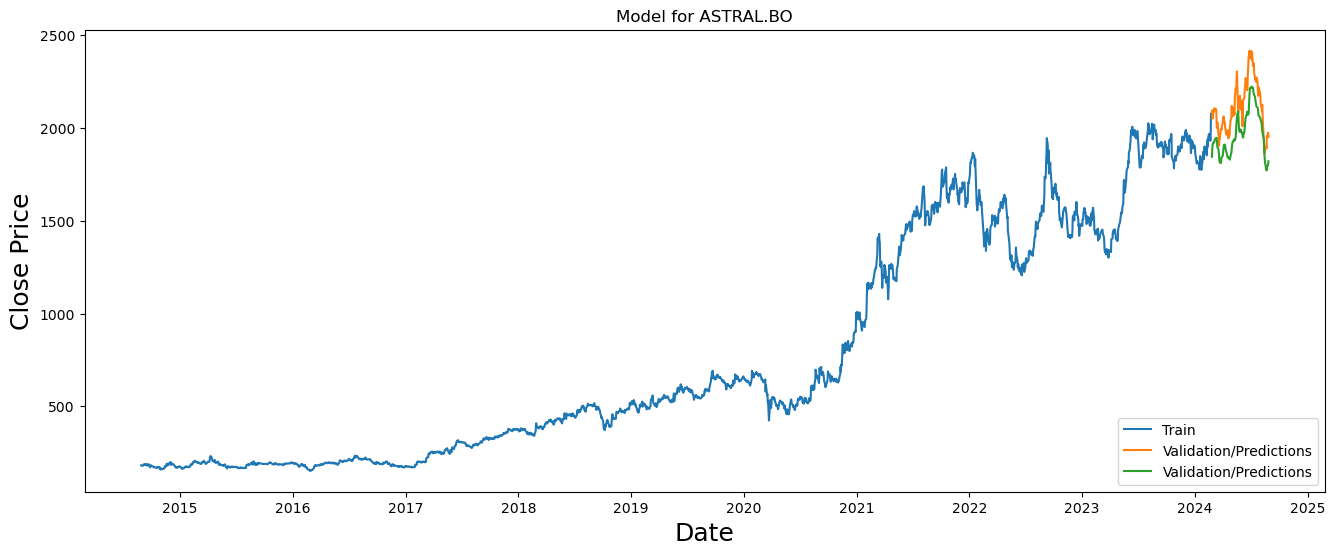

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing stock: TATAPOWER.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - loss: 0.0024
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
RMSE for TATAPOWER.NS: 28.9038

Last 50 rows for TATAPOWER.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │  448.65 │       421.621 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │  451.7  │       423.259 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │  442.35 │       424.274 │             0 │                  1 │            0 │
├────────────────────

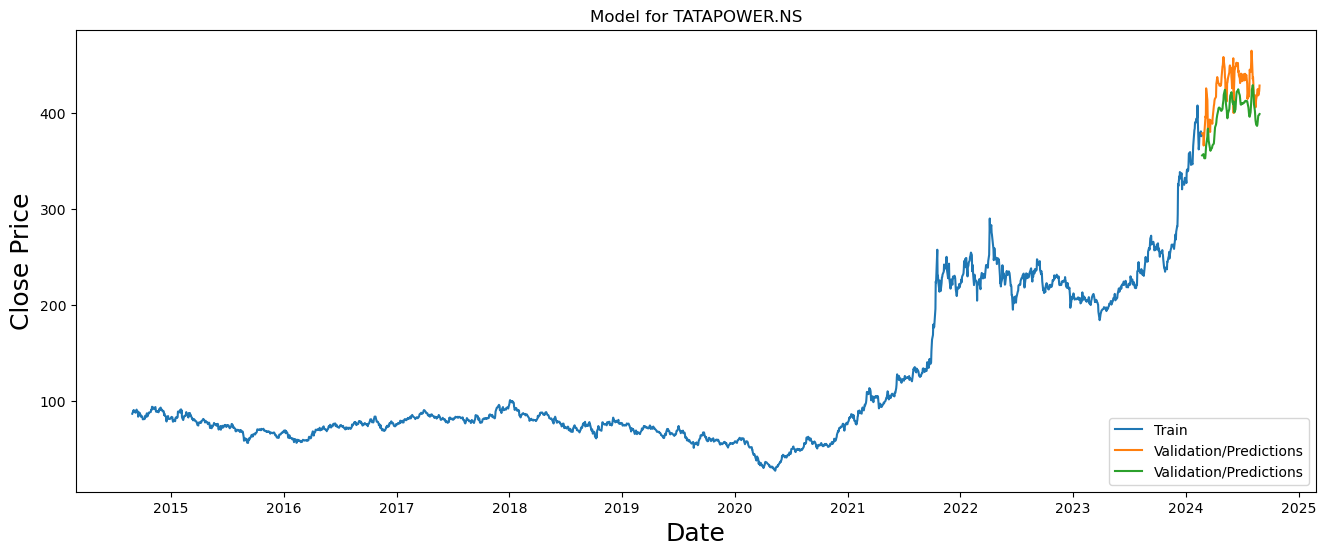

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing stock: SUZLON.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 71s 30ms/step - loss: 8.3392e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
RMSE for SUZLON.NS: 8.0065

Last 50 rows for SUZLON.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │   49.48 │       42.8783 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │   49.96 │       43.0389 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │   48.9  │       43.2136 │             0 │                  1 │            0 │
├─────────────────────┼─

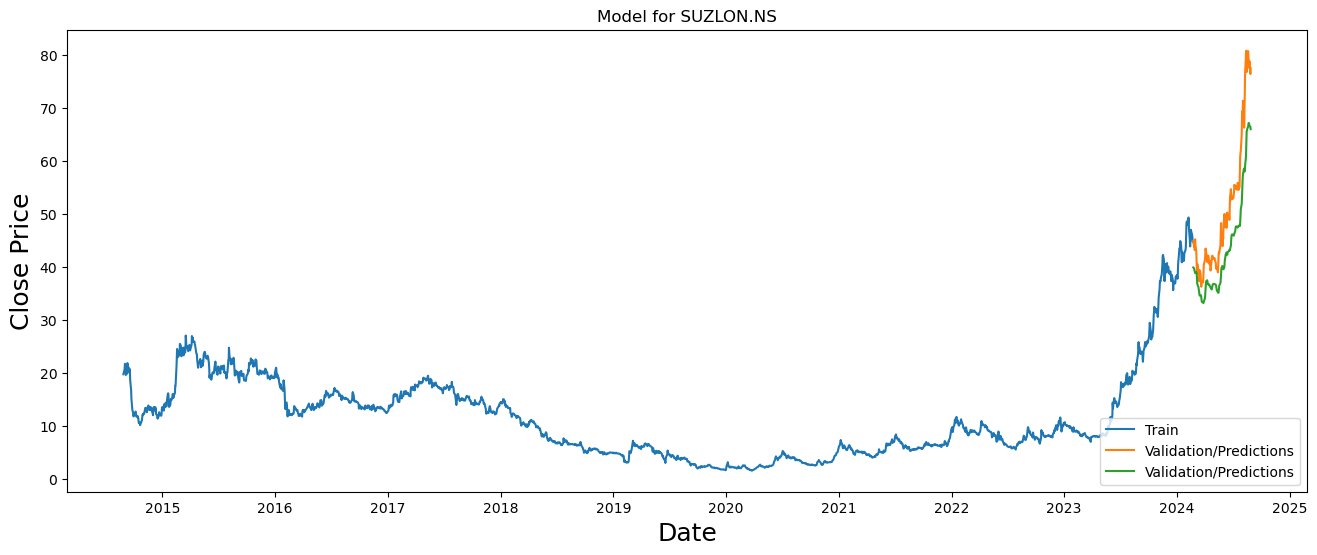

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing stock: HINDPETRO.BO


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2238/2238 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - loss: 0.0021
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
RMSE for HINDPETRO.BO: 10.1509

Last 50 rows for HINDPETRO.BO:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 357.5   │       354.843 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 353.467 │       357.949 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 343.8   │       358.123 │             0 │                  1 │            0 │
├────────────────────

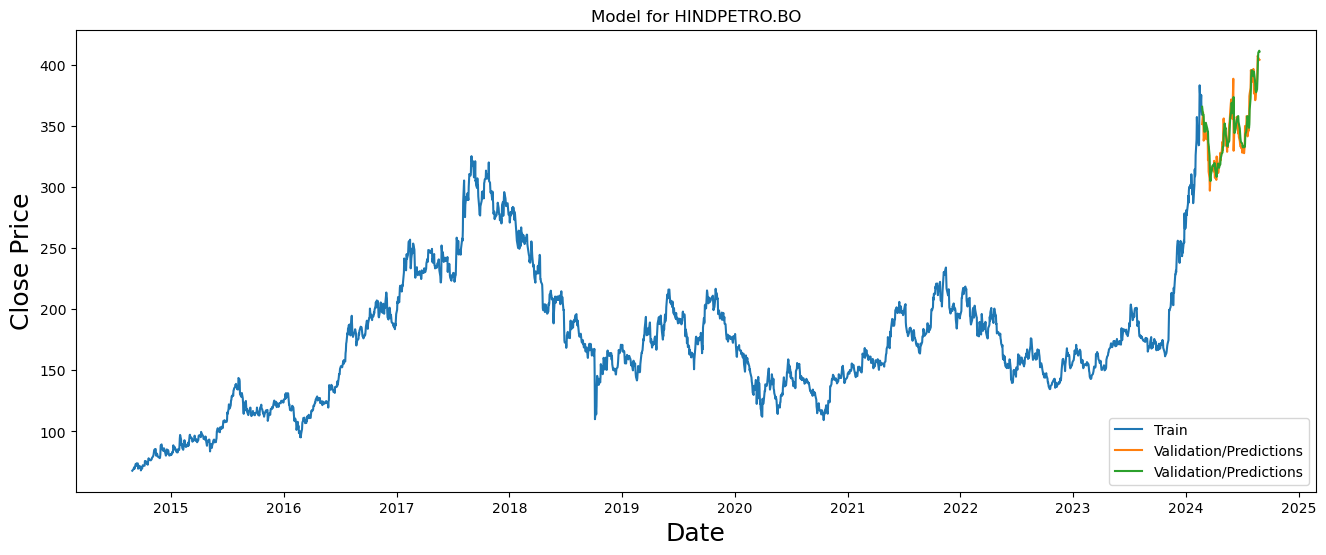

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Processing stock: HDFCBANK.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - loss: 0.0063
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
RMSE for HDFCBANK.NS: 73.7219

Last 50 rows for HDFCBANK.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 1596.9  │       1503    │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 1607.8  │       1510.3  │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 1657.85 │       1518.9  │             1 │                  1 │            1 │
├─────────────────────┼

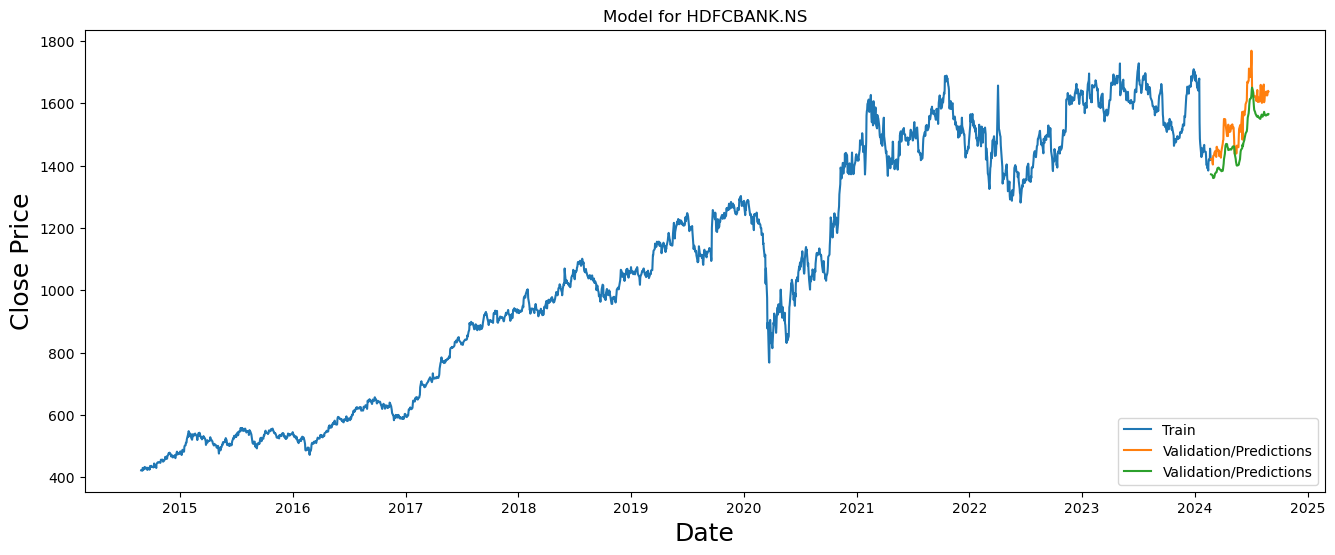

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing stock: INFY.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - loss: 0.0026
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
RMSE for INFY.NS: 38.2772

Last 50 rows for INFY.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 1488.9  │       1502    │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 1498.2  │       1501.89 │             1 │                  0 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 1511.35 │       1502.53 │             1 │                  1 │            1 │
├─────────────────────┼────────

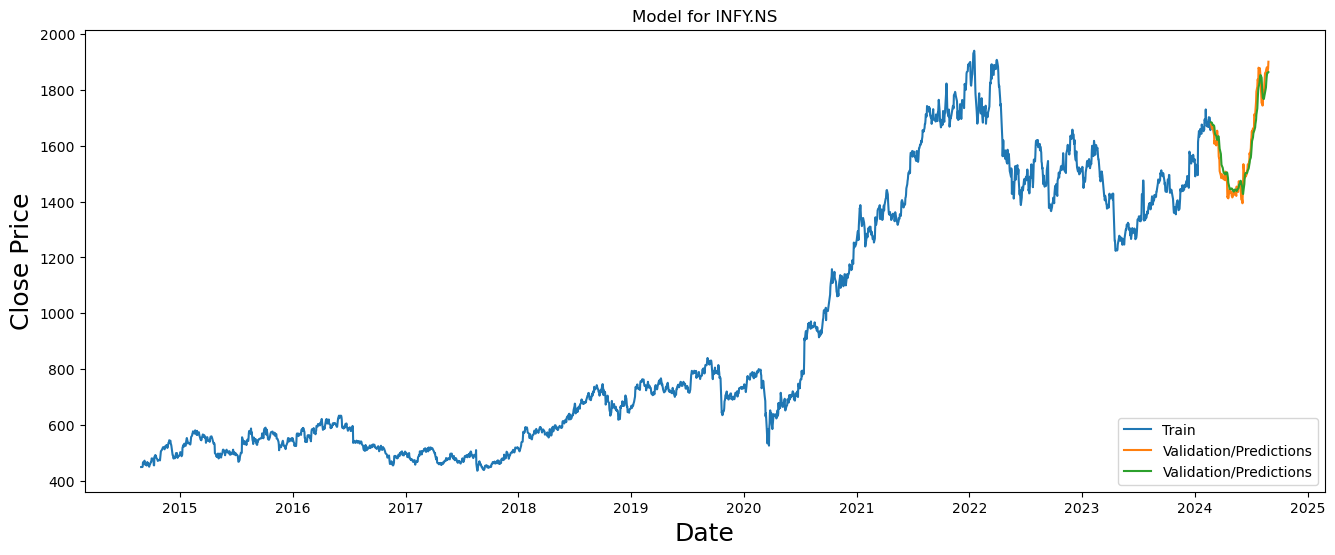

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing stock: ULTRACEMCO.NS


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2239/2239 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - loss: 0.0028
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
RMSE for ULTRACEMCO.NS: 239.4254

Last 50 rows for ULTRACEMCO.NS:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 11242.8 │       10905.6 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 11119   │       11044.2 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 10995.5 │       11110.2 │             0 │                  1 │            0 │
├─────────────────

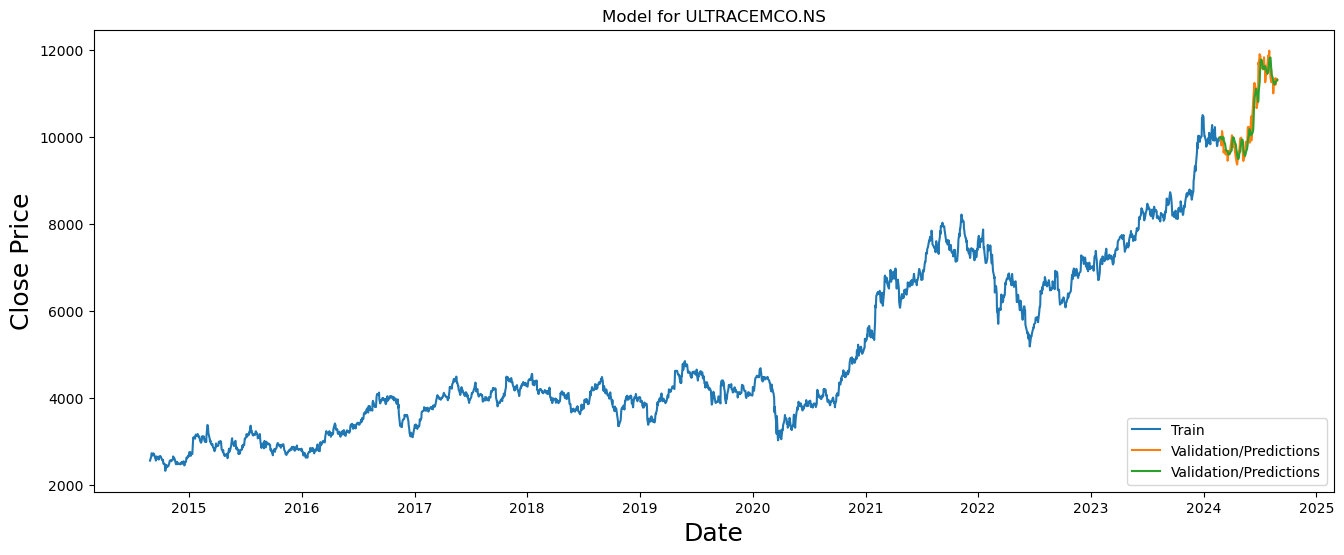

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Processing stock: MAHLIFE.BO


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2221/2221 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - loss: 0.0031
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
RMSE for MAHLIFE.BO: 20.7217

Last 50 rows for MAHLIFE.BO:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │  617.65 │       611.522 │             0 │                  1 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │  634.95 │       617.386 │             1 │                  1 │            1 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │  630.65 │       624.476 │             0 │                  1 │            0 │
├─────────────────────┼──

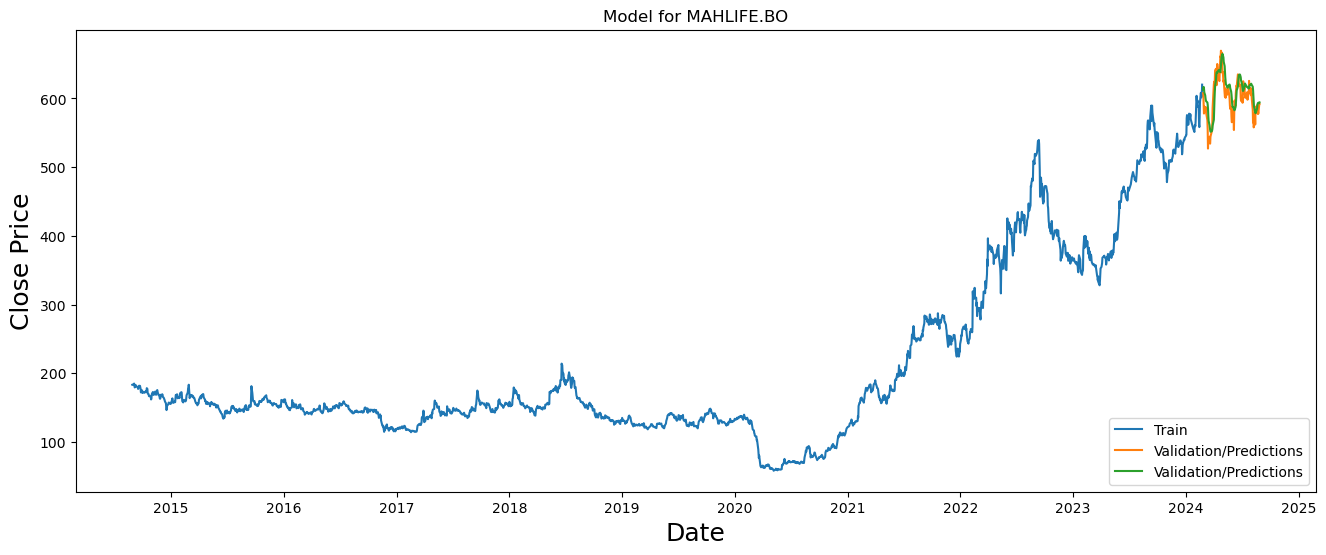

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing stock: ADANIGREEN.BO


C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1332/1332 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - loss: 0.0055
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
RMSE for ADANIGREEN.BO: 202.1290

Last 50 rows for ADANIGREEN.BO:

╒═════════════════════╤═════════╤═══════════════╤═══════════════╤════════════════════╤══════════════╕
│ Date                │   Close │   Predictions │   Close_Trend │   Prediction_Trend │   Trend_Same │
╞═════════════════════╪═════════╪═══════════════╪═══════════════╪════════════════════╪══════════════╡
│ 2024-06-14 00:00:00 │ 1806.25 │       2038.11 │             1 │                  0 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-18 00:00:00 │ 1813.05 │       2027.64 │             1 │                  0 │            0 │
├─────────────────────┼─────────┼───────────────┼───────────────┼────────────────────┼──────────────┤
│ 2024-06-19 00:00:00 │ 1789.65 │       2018.42 │             0 │                  0 │            1 │
├─────────────────

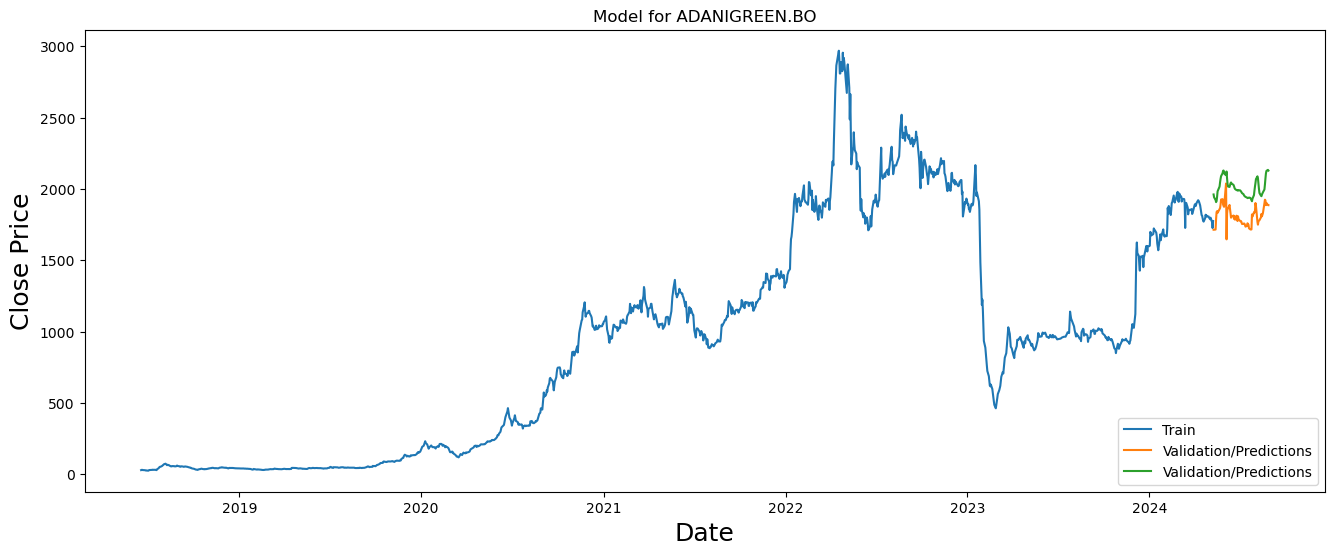

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [66]:
# Lists to store predicted prices and close prices of the previous day for all stocks
predicted_prices_list = []
previous_close_prices_list = []

# Assuming `stocks` is a list of DataFrames for each stock and `tech_list` contains stock names
for i, df in enumerate(stocks):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of stocks
    print(f"Processing stock: {stock_name}")

    # Prepare the data
    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .95))

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['Close']])

    # Save the scaler to a file
    joblib.dump(scaler, f'scaler_{stock_name}.pkl')

    # Create the training data set
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []

    for j in range(100, len(train_data)):
        x_train.append(train_data[j-100:j, 0])
        y_train.append(train_data[j, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Create the testing data set
    test_data = scaled_data[training_data_len - 100:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for j in range(100, len(test_data)):
        x_test.append(test_data[j-100:j, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the model's predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print(f"RMSE for {stock_name}: {rmse:.4f}")

    train = data[:training_data_len]
    valid = data[training_data_len:].copy()  # Make a copy of valid

    # Assign predictions
    valid['Predictions'] = predictions

    # Calculate trends and matching trends for the last 50 rows
    valid['Close_Trend'] = valid['Close'].diff().apply(lambda x: 1 if x > 0 else 0)
    valid['Prediction_Trend'] = valid['Predictions'].diff().apply(lambda x: 1 if x > 0 else 0)
    
    # Focus only on the last 50 rows
    valid_last_50 = valid.tail(50).copy()
    valid_last_50['Trend_Same'] = (valid_last_50['Close_Trend'] == valid_last_50['Prediction_Trend']).astype(int)
    
    # Count matching trends for the last 50 rows
    same_trend_count_last_50 = valid_last_50['Trend_Same'].sum()

    # Print the trimmed valid DataFrame
    print(f"\n{'='*50}\nLast 50 rows for {stock_name}:\n")
    print(tabulate(valid_last_50, headers='keys', tablefmt='fancy_grid'))

    # Display the number of matching trends for the last 50 rows
    print(f"\nNumber of matching trends for the last 50 rows of {stock_name}: {same_trend_count_last_50}")

    # Plot the results
    plt.figure(figsize=(16, 6))
    plt.title(f'Model for {stock_name}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.plot(train['Close'], label='Train')
    plt.plot(valid[['Close', 'Predictions']], label='Validation/Predictions')
    plt.legend(loc='lower right')
    plt.show()

    # Predict the next day's price
    last_100_days = scaled_data[-100:]
    last_100_days = np.reshape(last_100_days, (1, last_100_days.shape[0], 1))
    future_pred = model.predict(last_100_days)
    future_pred = scaler.inverse_transform(future_pred)

    # Store the predicted price and previous day's close price
    predicted_prices_list.append(future_pred[0, 0])
    previous_close_prices_list.append(df['Close'].iloc[-1])



In [67]:
# Print the lists for verification
print("\nPredicted prices for each stock:", predicted_prices_list)
print("Previous day's close prices for each stock:", previous_close_prices_list)


Predicted prices for each stock: [4148.976, 2471.5486, 3507.302, 1827.8295, 399.9997, 65.815704, 409.7665, 1567.0028, 1868.678, 11315.667, 595.99286, 2116.4917]
Previous day's close prices for each stock: [4497.14990234375, 2521.449951171875, 3551.25, 1952.550048828125, 428.1499938964844, 77.5, 404.1499938964844, 1637.75, 1900.0999755859375, 11300.349609375, 591.7000122070312, 1885.8499755859375]


In [68]:
print("Predicted prices for each stock:", predicted_prices_list)
print("Previous day's close prices for each stock:", previous_close_prices_list)

# Calculate expected return (example)
expected_return = np.array(predicted_prices_list) / np.array(previous_close_prices_list) - 1
print("Expected return for each stock:", expected_return)


Predicted prices for each stock: [4148.976, 2471.5486, 3507.302, 1827.8295, 399.9997, 65.815704, 409.7665, 1567.0028, 1868.678, 11315.667, 595.99286, 2116.4917]
Previous day's close prices for each stock: [4497.14990234375, 2521.449951171875, 3551.25, 1952.550048828125, 428.1499938964844, 77.5, 404.1499938964844, 1637.75, 1900.0999755859375, 11300.349609375, 591.7000122070312, 1885.8499755859375]
Expected return for each stock: [-0.077421   -0.01979074 -0.01237536 -0.06387574 -0.06574868 -0.15076511
  0.01389711 -0.0431978  -0.01653702  0.00135548  0.00725511  0.1223012 ]


In [69]:
j= 0
for i in range(len(stocks)):
    company_name = stocks[i]
    predicted_price = predicted_prices_list[i]
    previous_close_price = previous_close_prices_list[i]
    return_value = expected_return[i]
    
    # Print in a formatted way
    print(tech_list[j])
    print(f"Previous Close Price: {previous_close_price:.2f}")
    print(f"Predicted Price: {predicted_price:.2f}")
    print(f"Expected Return: {return_value:.4f}")
    print(f"Percentage Expected Return: {expected_return[i]*100:.4f} %")
    print("\n")
    j= j+1

TCS.NS
Previous Close Price: 4497.15
Predicted Price: 4148.98
Expected Return: -0.0774
Percentage Expected Return: -7.7421 %


NESTLEIND.NS
Previous Close Price: 2521.45
Predicted Price: 2471.55
Expected Return: -0.0198
Percentage Expected Return: -1.9791 %


TITAN.NS
Previous Close Price: 3551.25
Predicted Price: 3507.30
Expected Return: -0.0124
Percentage Expected Return: -1.2375 %


ASTRAL.BO
Previous Close Price: 1952.55
Predicted Price: 1827.83
Expected Return: -0.0639
Percentage Expected Return: -6.3876 %


TATAPOWER.NS
Previous Close Price: 428.15
Predicted Price: 400.00
Expected Return: -0.0657
Percentage Expected Return: -6.5749 %


SUZLON.NS
Previous Close Price: 77.50
Predicted Price: 65.82
Expected Return: -0.1508
Percentage Expected Return: -15.0765 %


HINDPETRO.BO
Previous Close Price: 404.15
Predicted Price: 409.77
Expected Return: 0.0139
Percentage Expected Return: 1.3897 %


HDFCBANK.NS
Previous Close Price: 1637.75
Predicted Price: 1567.00
Expected Return: -0.0432
Pe

In [70]:
print("Expected return vector is : ", expected_return)

Expected return vector is :  [-0.077421   -0.01979074 -0.01237536 -0.06387574 -0.06574868 -0.15076511
  0.01389711 -0.0431978  -0.01653702  0.00135548  0.00725511  0.1223012 ]


## Portfolio Optimisation

### Covariance Matrix and Daily Return vector

In [71]:
stock_data = {}
stock_pct_change = {}
daily_expected_returns = []

In [72]:
j = 0 
for st in tech_list:  
    data = stocks[j] 
    # Calculate daily percentage change
    pct_change = data['Close'].pct_change().dropna()
    stock_pct_change[st] = pct_change  # Store daily percentage changes
    
    # Calculate mean daily return
    mean_daily_return = pct_change.mean()
    daily_expected_returns.append(mean_daily_return)
    j = j + 1

# Convert list of daily expected returns into a numpy array
daily_expected_returns_vector = np.array(daily_expected_returns)

# Print expected daily returns for each stock
for st, ret in zip(tech_list, daily_expected_returns_vector):
    print(f"Expected daily return for {st}: {ret:.4%}")

# Convert percentage changes to DataFrame
pct_change_df = pd.DataFrame(stock_pct_change)

# Calculate covariance matrix of percentage changes
cov_matrix = pct_change_df.cov().to_numpy()


Expected daily return for TCS.NS: 0.0629%
Expected daily return for NESTLEIND.NS: 0.0690%
Expected daily return for TITAN.NS: 0.1110%
Expected daily return for ASTRAL.BO: 0.1208%
Expected daily return for TATAPOWER.NS: 0.0897%
Expected daily return for SUZLON.NS: 0.1253%
Expected daily return for HINDPETRO.BO: 0.1037%
Expected daily return for HDFCBANK.NS: 0.0654%
Expected daily return for INFY.NS: 0.0727%
Expected daily return for ULTRACEMCO.NS: 0.0752%
Expected daily return for MAHLIFE.BO: 0.0716%
Expected daily return for ADANIGREEN.BO: 0.3401%


## Objective Function

Our goal is to minimize risk while ensuring that our investment meets a specified return threshold. To achieve this, we'll focus on reducing the variance of the stock's returns, which represents the risk. We will minimize the variance of the portfolio while adhering to certain constraints.

In [73]:
# Define the objective function (minimize variance)
def objective_function(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights  # Minimize portfolio variance

## Constraints
- Sum of all the weights should be 1
- Expected return >= threshold return
- Each weight should be between 0 and 1 (both inclusive)


In [74]:
# Define constraints and bounds
threshold_return = 0.04  # Set your desired daily threshold return here (0.1%)

# Check if the threshold return is feasible
if threshold_return > max(expected_return):
    print("The threshold return exceeds the maximum possible return. Enter a feasible return ")

# Constraints: weights sum to 1 and expected return >= threshold_return
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': lambda weights: np.dot(weights, expected_return) - threshold_return}  # Expected return >= threshold_return
]

bounds = [(0, 1) for _ in stocks]  # No short selling (0 <= weight <= 1)


### Calculating optimized weights

In [75]:
from scipy.optimize import minimize
# Initial guess (equal distribution)
initial_weights = np.array([1/len(stocks)] * len(stocks))

# Minimize the portfolio variance
result = minimize(objective_function, initial_weights, args=(cov_matrix,), 
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
optimized_weights = result.x
print("Optimized Portfolio Weights:", optimized_weights)

# Calculate expected daily portfolio return
expected_daily_portfolio_return = np.dot(optimized_weights, expected_return)
print(f"Expected Daily Portfolio Return: {expected_daily_portfolio_return:.4%}")

# Calculate portfolio variance (risk)
portfolio_variance = result.fun
print(f"Portfolio Variance (Risk): {portfolio_variance:.4f}")


Optimized Portfolio Weights: [0.         0.07479631 0.08883174 0.         0.         0.
 0.13880931 0.03016109 0.08096568 0.11498135 0.12623579 0.34521873]
Expected Daily Portfolio Return: 4.0000%
Portfolio Variance (Risk): 0.0003


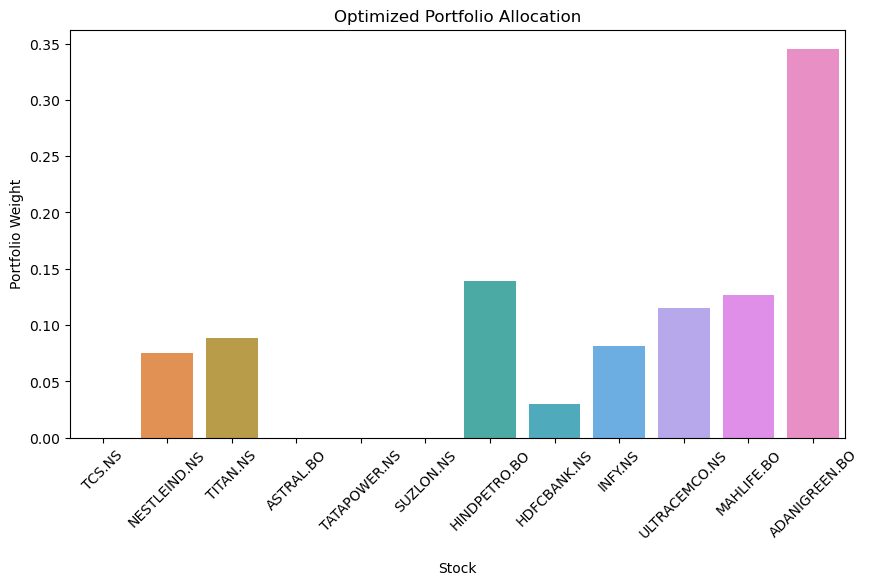

In [76]:
portfolio_df = pd.DataFrame({
    'Stock': tech_list,
    'Weight': optimized_weights
})

# Plot the optimized portfolio allocation
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='Weight', data=portfolio_df)
plt.title('Optimized Portfolio Allocation')
plt.ylabel('Portfolio Weight')
plt.xlabel('Stock', labelpad=15)  # Adjust the gap between labels and x-axis

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)  # Adjust bottom space to accommodate rotated labels

plt.show()